In [1]:
from _config import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

-------------------------------------------------
----- Environment variables from .env file: -----
-------------------------------------------------
-------------------------------------------------


In [2]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

### Start with Spring (1)

In [3]:
#Start with spring and work our way down to winter
season = 1
season_year = 2014
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2014-03-01 to 2014-05-31
Columns: 266 entries, 10000009 to 22000047
dtypes: float64(266)
memory usage: 191.9 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2014-03-01  1.068467  0.820827  0.650156  0.899395  0.692650  0.681864   
2014-03-02  1.123572  0.967063  0.783297  0.951369  0.822995  0.810179   
2014-03-03  1.267020  1.022534  0.799611  0.993471  0.786096  0.773855   
2014-03-04  1.151736  0.919428  0.710917  0.939313  0.737854  0.726365   
2014-03-05  1.090126  0.845227  0.661951  0.901452  0.735011  0.723566   
...              ...       ...       ...       ...       ...       ...   
2014-05-27  0.669857  0.530984  0.569927  0.686569  0.461393  0.454208   
2014-05-28  0.651948  0.512965  0.507822  0.671494  0.446390  0.439439   
2014-05-29  0.631666  0.492618  0.465728  0.655094  0.433090  0.426346   
2014-05-30  0.617274  0.478356  0.328812  0.645590  0.424257  0.417651   
2014-05-31  0.606280  0.467242  0.322461  0.635894  0.421006  0.414450   

             1000219  11000011  11000016  12000001  ...  66000034  67000017  \
2014-03-01  2.845181  2.508598  

          2014-03-01  2014-03-02  2014-03-03  2014-03-04  2014-03-05  \
10000009   -0.030042   -0.089366    0.154889    0.131885    0.138129   
10000010   -0.414951   -0.309125   -0.193763   -0.223430   -0.251357   
10000011   -0.680226   -0.567154   -0.511664   -0.542349   -0.542839   
10000014   -0.292832   -0.331160   -0.235208   -0.193017   -0.161937   
10000016   -0.614178   -0.511413   -0.530937   -0.501147   -0.426644   
...              ...         ...         ...         ...         ...   
7000003     0.122202    0.169383    0.533131    0.414392    0.355651   
8000001     0.473392    0.467156    0.824879    0.718639    0.599803   
9000001     3.244600    2.953797    3.306944    3.360189    3.416235   
9000015     2.950039    2.673780    2.999751    3.058899    3.118103   
22000047   -0.638741   -0.550238   -0.646590   -0.646894   -0.607888   

          2014-03-06  2014-03-07  2014-03-08  2014-03-09  2014-03-10  ...  \
10000009    0.151940    0.132923    0.207014    0.215266  

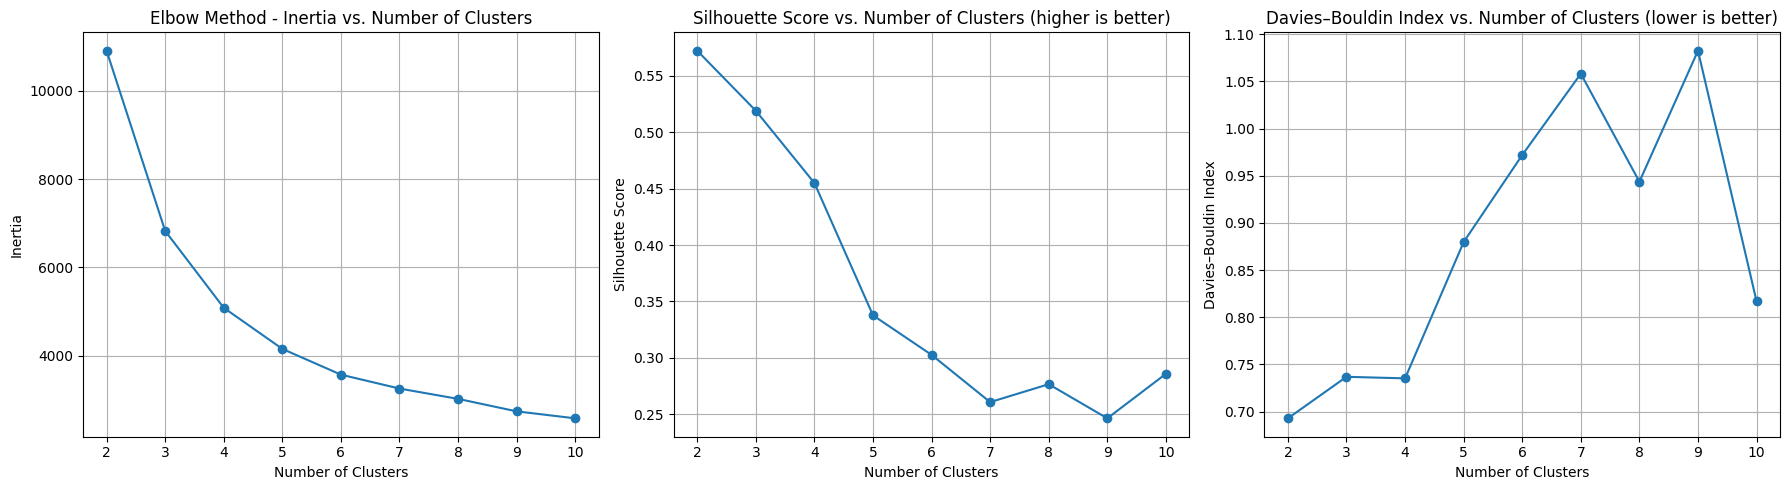

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
#import numpy as np

# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        2
10000010        0
10000011        0
10000014        2
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2014-03-01  1.068467  0.820827  0.650156  0.899395  0.692650  0.681864   
2014-03-02  1.123572  0.967063  0.783297  0.951369  0.822995  0.810179   
2014-03-03  1.267020  1.022534  0.799611  0.993471  0.786096  0.773855   
2014-03-04  1.151736  0.919428  0.710917  0.939313  0.737854  0.726365   
2014-03-05  1.090126  0.845227  0.661951  0.901452  0.735011  0.723566   
...              ...       ...       ...       ...       ...       ...   
2014-05-27  0.669857  0.530984  0.569927  0.686569  0.461393  0.454208   
2014-05-28  0.651948  0.512965  0.507822  0.671494  0.446390  0.439439   
2014-05-29  0.631666  0.492618  0.465728  0.655094  0.433090  0.426346   
2014-05-30  0.617274  0.478356  0.328812  0.645590  0.424257  0.417651   
2014-05-31  0.606280  0.467242  0.322461  0.635894  0.421006  0.414450   

             1000219  11000011  11000016  12000001  ...  66000034  67000017  \
2014-03-01  2.845181  2.508598  

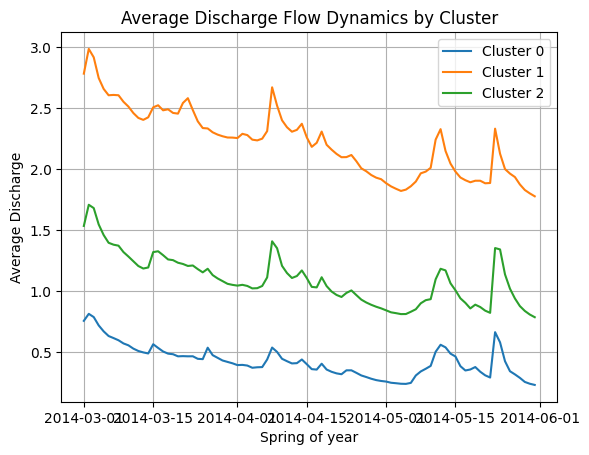

In [5]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure()
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Spring of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)
#print(out_path)

In [7]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2014-03-01  1.068467  0.820827  0.650156  0.899395  0.692650  0.681864   
2014-03-02  1.123572  0.967063  0.783297  0.951369  0.822995  0.810179   
2014-03-03  1.267020  1.022534  0.799611  0.993471  0.786096  0.773855   
2014-03-04  1.151736  0.919428  0.710917  0.939313  0.737854  0.726365   
2014-03-05  1.090126  0.845227  0.661951  0.901452  0.735011  0.723566   
...              ...       ...       ...       ...       ...       ...   
2014-05-27  0.669857  0.530984  0.569927  0.686569  0.461393  0.454208   
2014-05-28  0.651948  0.512965  0.507822  0.671494  0.446390  0.439439   
2014-05-29  0.631666  0.492618  0.465728  0.655094  0.433090  0.426346   
2014-05-30  0.617274  0.478356  0.328812  0.645590  0.424257  0.417651   
2014-05-31  0.606280  0.467242  0.322461  0.635894  0.421006  0.414450   

             1000219  11000011  11000016  12000001  ...  66000034  67000017  \
2014-03-01  2.845181  2.508598  2.249548  0.642529  ...  1.687536  0.804398   
2014-03-02  3.011549  2.504923  2.373683  0.778561  ...  1.605596  0.768065   
2014-03-03  3.211053  2.534371  2.484560  0.778685  ...  1.532726  0.726774   
2014-03-04  3.008874  2.526000  2.196824  0.699662  ...  1.470989  0.681511   
2014-03-05  2.746072  2.475153  2.004551  0.643470  ...  1.414902  0.634680   
...              ...       ...       ...       ...  ...       ...       ...   
2014-05-27  0.869182  0.592334  0.783947  0.376398  ...  0.125589  0.069882   
2014-05-28  0.842313  0.574172  0.755957  0.370035  ...  0.124066  0.063541   
2014-05-29  0.794639  0.552458  0.732778  0.365135  ...  0.123314  0.060718   
2014-05-30  0.767620  0.535501  0.713907  0.363689  ...  0.124588  0.060130   
2014-05-31  0.761020  0.523638  0.703159  0.361834  ...  0.131903  0.059294   

            67000018  67000019  67000030   7000003   8000001   9000001  \
2014-03-01  0.675166  0.929849  0.945405  1.166416  1.392362  3.175281   
2014-03-02  0.633274  0.877492  0.928094  1.307850  1.519921  3.290879   
2014-03-03  0.592527  0.827666  0.890460  1.532256  1.736840  3.477346   
2014-03-04  0.533187  0.784032  0.852997  1.336441  1.535361  3.262426   
2014-03-05  0.484280  0.734081  0.806338  1.226899  1.380415  3.151315   
...              ...       ...       ...       ...       ...       ...   
2014-05-27  0.082678  0.085993  0.111490  0.462130  0.660036  1.235849   
2014-05-28  0.081174  0.078191  0.110138  0.391745  0.585212  1.140765   
2014-05-29  0.076946  0.074716  0.109471  0.341750  0.531145  1.089669   
2014-05-30  0.072702  0.073993  0.110602  0.340070  0.491312  1.081657   
2014-05-31  0.084188  0.072964  0.117096  0.340227  0.462532  1.076158   

             9000015  22000047  
2014-03-01  2.985768  0.676847  
2014-03-02  3.091455  0.795344  
2014-03-03  3.261932  0.704997  
2014-03-04  3.065441  0.642564  
2014-03-05  2.963857  0.621050  
...              ...       ...  
2014-05-27  1.212635  0.482847  
2014-05-28  1.125704  0.477884  
2014-05-29  1.078989  0.476418  
2014-05-30  1.071664  0.476373  
2014-05-31  1.066636  0.478699  

[92 rows x 266 columns]

<Axes: >

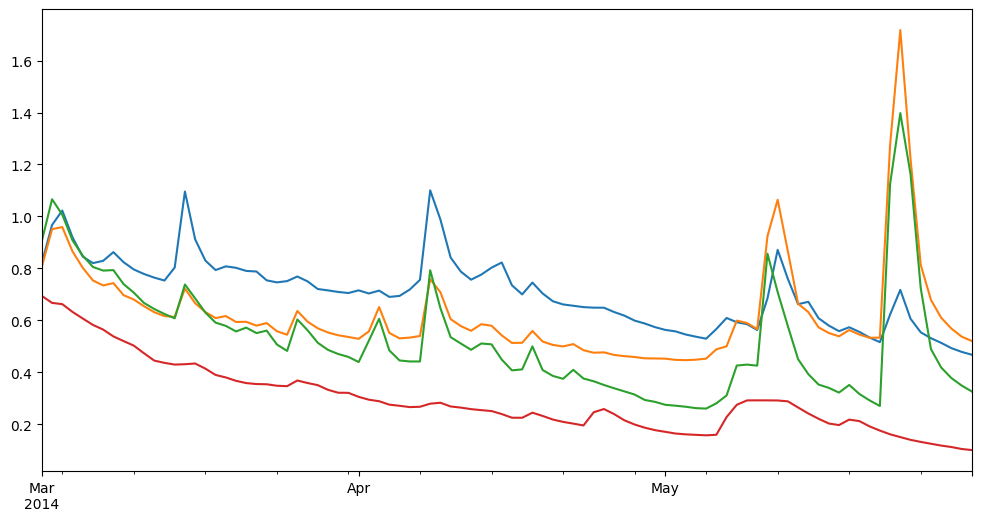

In [8]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

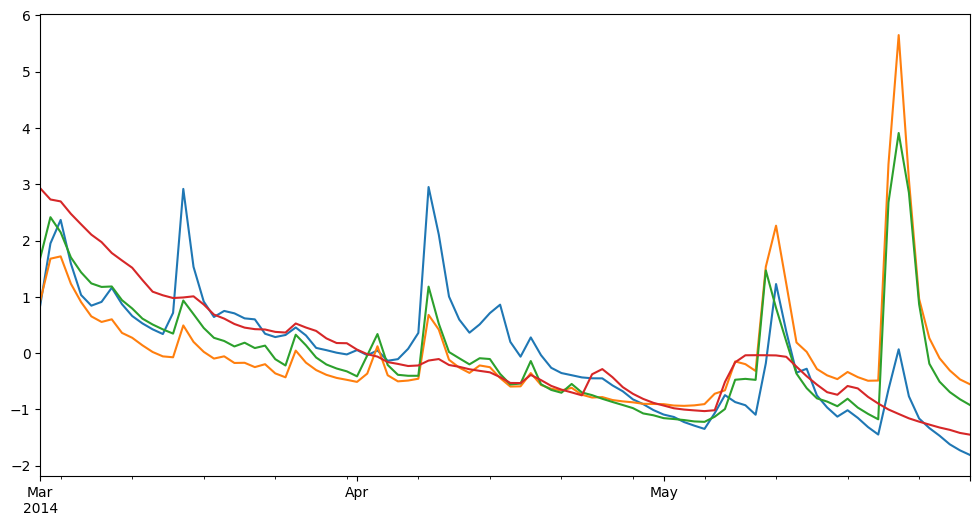

In [9]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

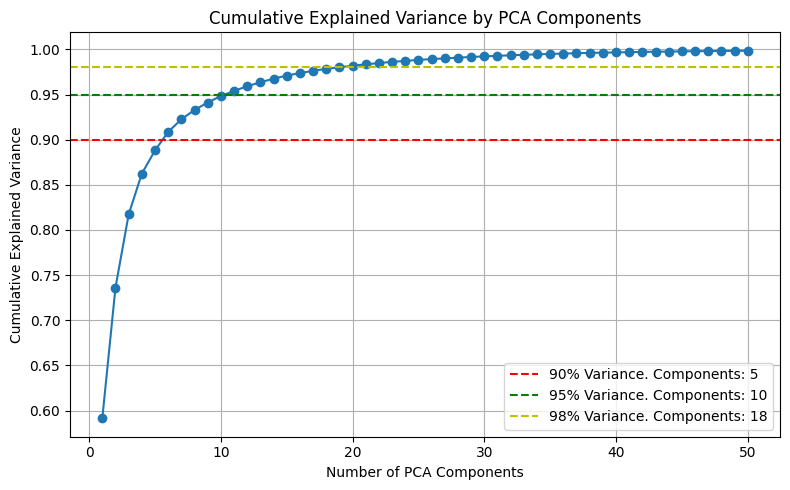

In [10]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 32.33101436,  -2.44190788,   4.57375208, ...,   0.26627361,
         -1.42211373,   0.22352212],
       [ 39.30949481,   0.13402379,   0.41612543, ...,  -1.44022264,
         -0.87658545,  -0.2586283 ],
       [ 37.24018417,   0.08126028,   1.08308731, ...,   1.28562909,
          0.63348247,   0.80197349],
       ...,
       [-17.04606712,   2.00707733,  -0.55211169, ...,   0.17978459,
         -0.52910638,   0.18945897],
       [-18.44496467,   1.15065605,  -0.61890082, ...,   0.04413056,
         -0.91578925,   0.06780053],
       [-19.49751225,   0.51718824,  -0.7158227 , ...,  -0.19588958,
         -0.8784672 ,   0.19109047]], shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_56632\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


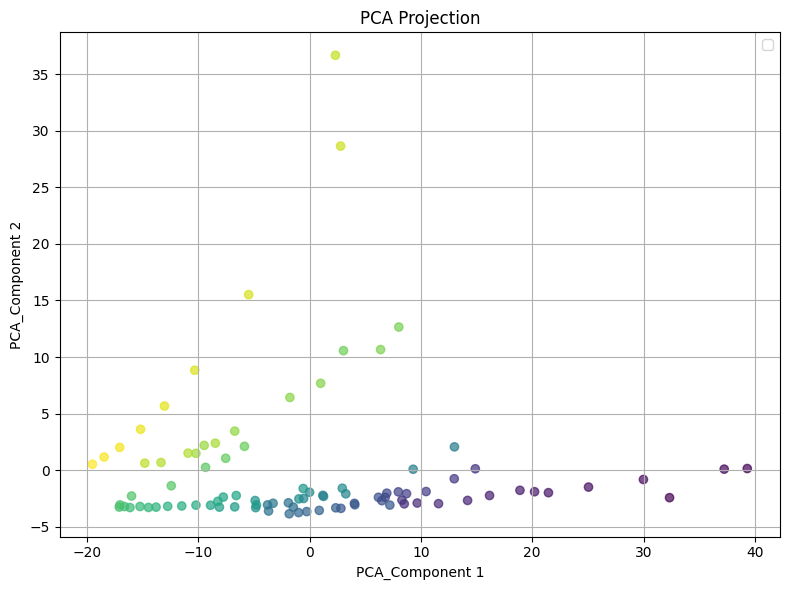

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_56632\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


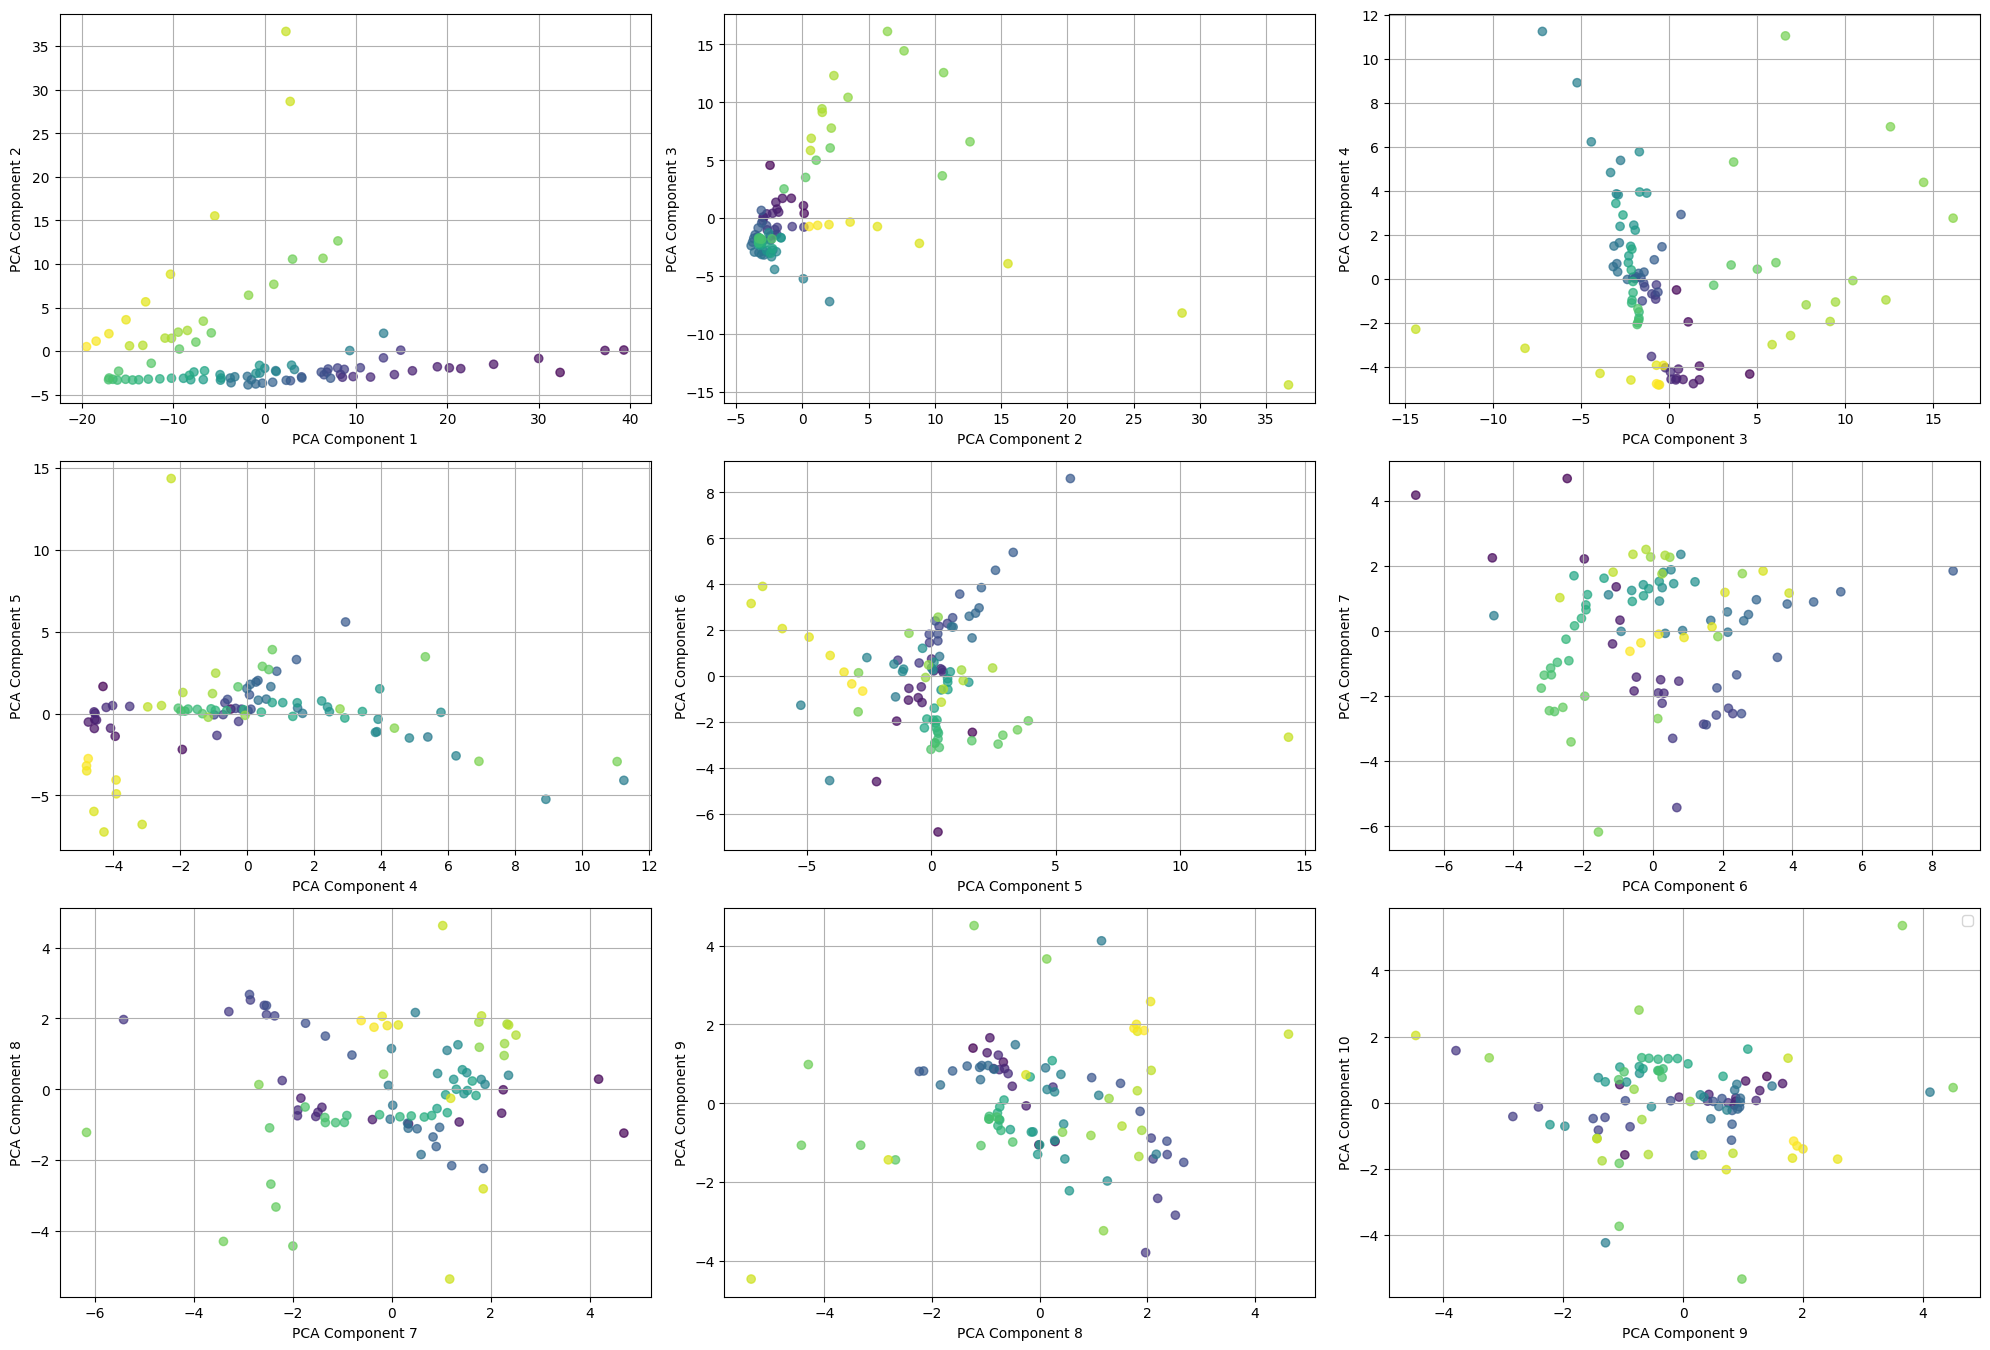

In [13]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.345
KMeans Davies-Bouldin Index is 0.939


<Axes: xlabel='k'>

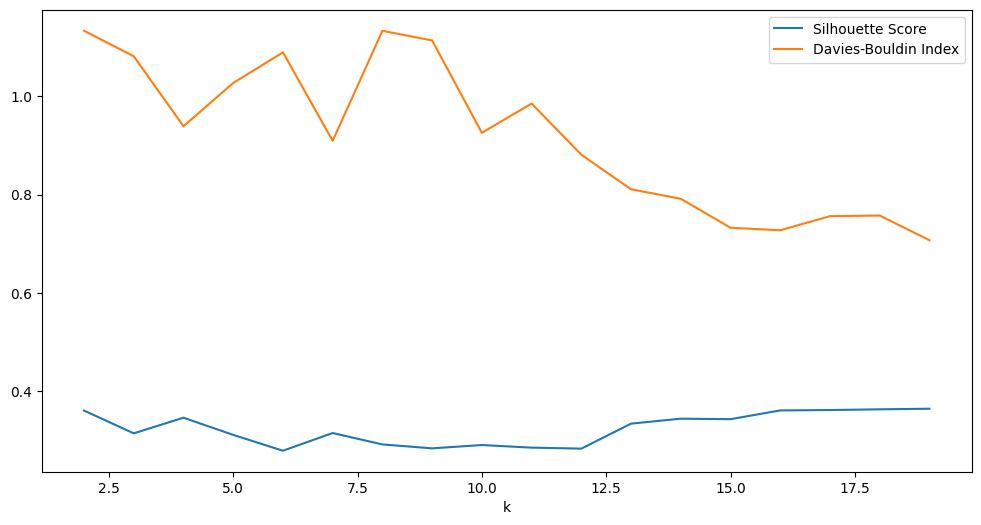

In [15]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         1     88               NaN   
2    1.01            3         1     88               NaN   
3    1.27            3         2     84         -0.011780   
4    1.52            3         2     82         -0.017435   
5    1.78            3         4     75         -0.191814   
6    2.03            3         5     71         -0.130471   
7    2.29            3         7     59         -0.112237   
8    2.54            3         7     52         -0.029356   
9    2.80            3         7     47          0.001442   
10   3.05            3         7     40          0.046064   
11   3.31            3         6     40          0.021260   
12   3.56            3         6     36          0.073003   
13   3.82            3         6     32          0.105762   
14   4.07            3         6     32          0.105762   
15   4.33            3         7     28          0.127315   
16   4.58            3         6     26          0.086309   
17   4.84            3         6     20          0.123721   
18   5.09            3         6     19          0.129212   
19   5.35            3         6     18          0.141068   
20   5.60            3         5     17          0.208279   
21   5.86            3         5     17          0.208279   
22   6.11            3         4     17          0.085205   
23   6.37            3         4     16          0.095083   
24   6.62            3         4     16          0.095083   
25   6.88            3         4     16          0.095083   
26   7.13            3         3     16          0.137330   
27   7.39            3         3     15          0.145466   
28   7.64            3         3     13          0.140005   
29   7.90            3         3     13          0.140005   
30   8.15            3         2     13          0.102136   
31   8.41            3         2     13          0.102136   
32   8.66            3         2     13          0.102136   
33   8.92            3         2     10          0.112829   
34   9.17            3         2      8          0.108010   
35   9.43            3         2      8          0.108010   
36   9.68            3         1      7               NaN   
37   9.94            3         1      7               NaN   
38  10.19            3         1      7               NaN   
39  10.45            3         1      5               NaN   
40  10.70            3         1      5               NaN   
41  10.96            3         1      5               NaN   
42  11.21            3         1      4               NaN   
43  11.47            3         1      4               NaN   
44  11.72            3         1      4               NaN   
45  11.98            3         1      4               NaN   
46  12.23            3         1      4               NaN   
47  12.49            3         1      4               NaN   
48  12.74            3         1      4               NaN   
49  13.00            3         1      4               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3               0.884350  
4               0.949031  
5               1.522746  
6               1.278321  
7               1.651516  
8               1.783635  
9               1.790129  
10              1.727591  
11              1.776562  
12              1.803312  
13              1.790693  
14              1.790693  
15              1.674190  
16              1.687312  
17              1.641074  
18              1.574119  
19              1.528558  
20              1.563956  
21              1.563956  
22              1.509291  
23              1.444851  
24              1.444851  
25              1.444851  
26              1.517475  
27              1.468599  
28              1.534540  
29              1.534540  
30              1.721260  
31              1.721260  
32 

<Axes: xlabel='eps'>

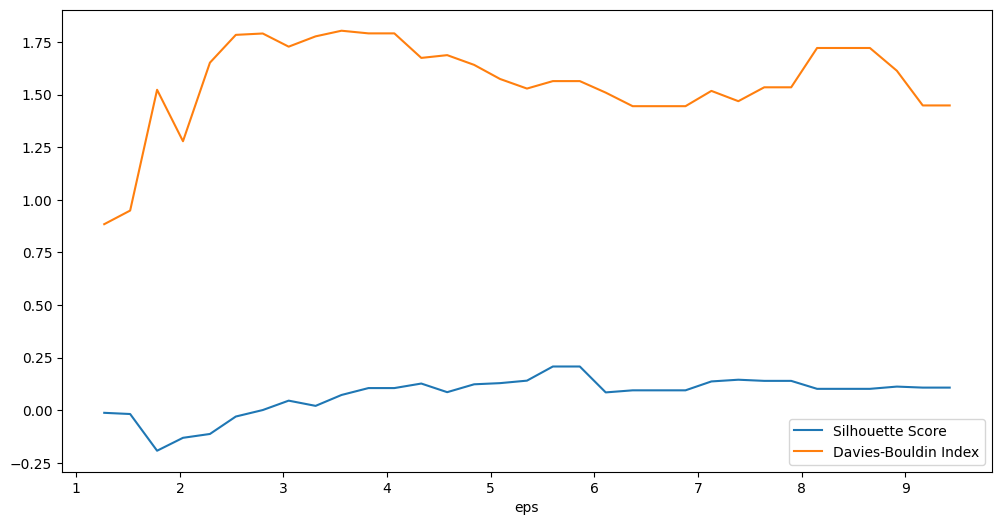

In [16]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

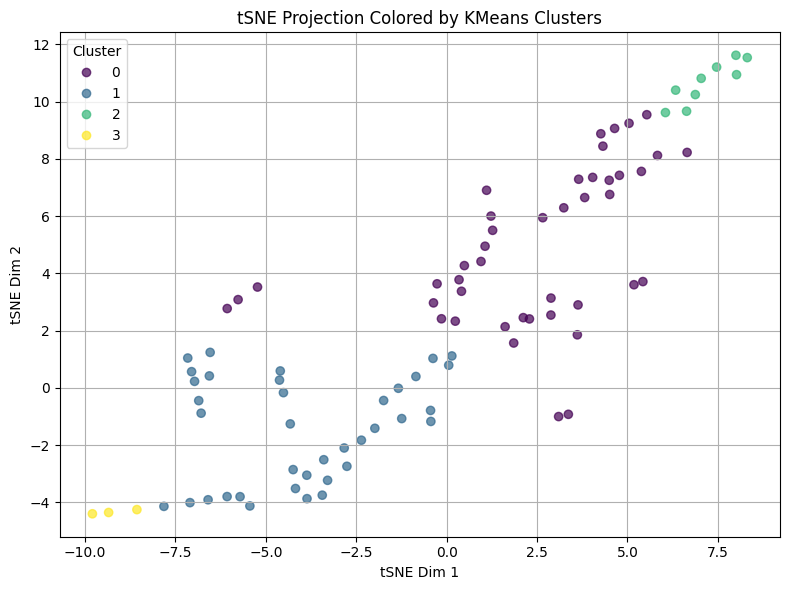

In [17]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         6    254          0.990975   
1    0.05            2         6    254          0.990975   
2    0.06            2         6    254          0.990975   
3    0.06            2         6    254          0.990975   
4    0.07            2         6    254          0.990975   
..    ...          ...       ...    ...               ...   
195  0.98            2        28    111          0.251716   
196  0.99            2        30    107          0.253399   
197  0.99            2        30    107          0.253399   
198  1.00            2        30    106          0.251657   
199  1.00            2        30    105          0.250454   

     Davies-Bouldin Index  
0                0.010926  
1                0.010926  
2                0.010926  
3                0.010926  
4                0.010926  
..                    ...  
195              0.604146  
196              0.608947  
197              0.608947  
198              0.611884  
199              0.619788  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

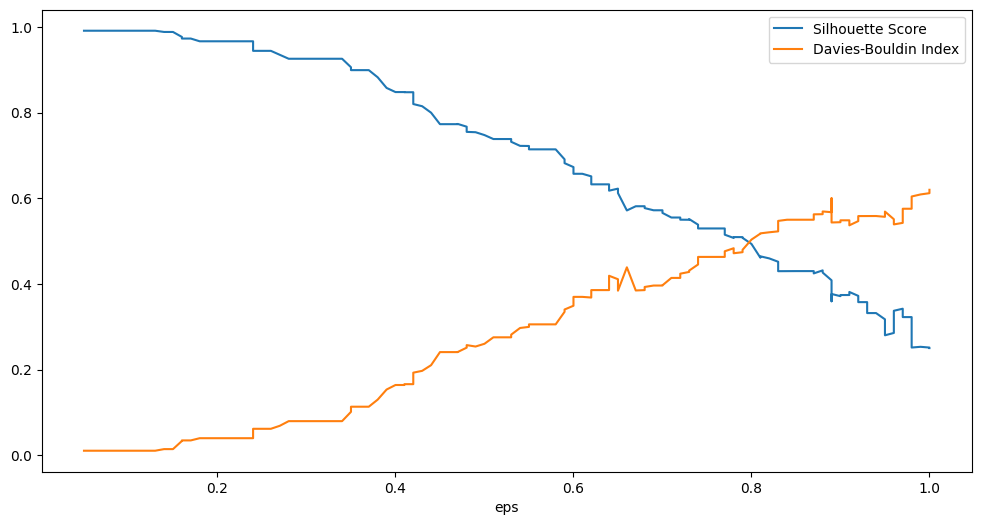

In [18]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Summer (2)

In [19]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [20]:
#Start with spring and work our way down to winter
season = 2
season_year = 2014
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] 
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2014-06-01 to 2014-08-31
Columns: 260 entries, 10000009 to 22000047
dtypes: float64(260)
memory usage: 187.6 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2014-06-01  0.598611  0.457331  0.316797  0.627606  0.418509  0.411992   
2014-06-02  0.589249  0.452549  0.314064  0.621490  0.412121  0.405703   
2014-06-03  0.584075  0.442093  0.308088  0.616098  0.408361  0.402002   
2014-06-04  0.580023  0.436333  0.304797  0.608509  0.402947  0.396673   
2014-06-05  0.593652  0.435768  0.304474  0.607088  0.405727  0.399409   
...              ...       ...       ...       ...       ...       ...   
2014-08-27  0.609515  0.464924  0.151140  0.585768  0.339004  0.333725   
2014-08-28  0.600059  0.455411  0.142544  0.570293  0.329625  0.324493   
2014-08-29  0.614643  0.442223  0.132268  0.565786  0.368085  0.362353   
2014-08-30  0.680005  0.486158  0.133115  0.608683  0.449044  0.442052   
2014-08-31  0.743086  0.641499  0.147500  0.655100  0.575700  0.566735   

             1000219  11000011  11000016  12000001  ...  66000034  67000017  \
2014-06-01  0.747031  0.513135  

          2014-06-01  2014-06-02  2014-06-03  2014-06-04  2014-06-05  \
10000009    0.288949    0.290395    0.288756    0.289735    0.269514   
10000010   -0.030165   -0.021323   -0.034020   -0.040248   -0.082265   
10000011   -0.347596   -0.337112   -0.338659   -0.342320   -0.374800   
10000014    0.354441    0.363915    0.361554    0.355154    0.299451   
10000016   -0.117854   -0.113512   -0.110704   -0.116918   -0.149200   
...              ...         ...         ...         ...         ...   
7000003    -0.341117   -0.365040   -0.394212   -0.412156   -0.458598   
8000001    -0.071277   -0.098212   -0.133905   -0.152138   -0.208648   
9000001     1.427652    1.459041    1.522356    1.681395    1.711729   
9000015     1.400997    1.432326    1.490856    1.637896    1.659032   
22000047    0.022050    0.037573    0.043528    0.043960    0.087400   

          2014-06-06  2014-06-07  2014-06-08  2014-06-09  2014-06-10  ...  \
10000009    0.220571    0.197880    0.228314    0.255397  

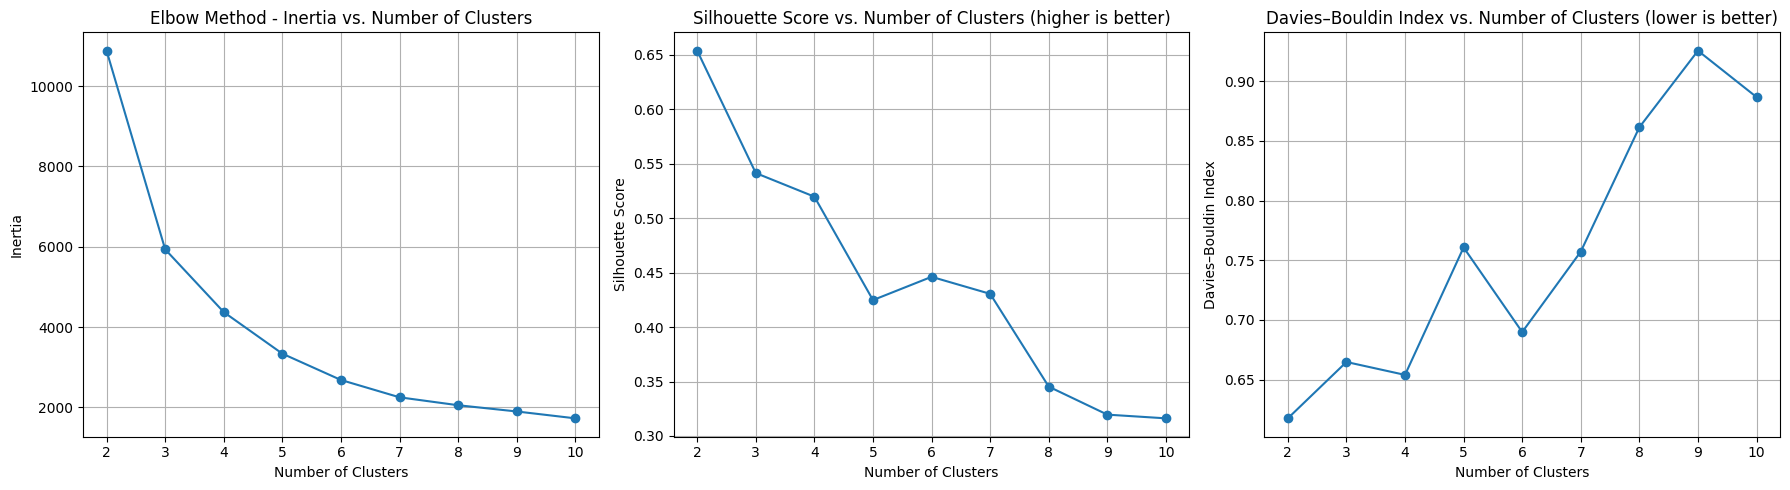

In [21]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        2
10000010        0
10000011        0
10000014        2
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2014-06-01  0.598611  0.457331  0.316797  0.627606  0.418509  0.411992   
2014-06-02  0.589249  0.452549  0.314064  0.621490  0.412121  0.405703   
2014-06-03  0.584075  0.442093  0.308088  0.616098  0.408361  0.402002   
2014-06-04  0.580023  0.436333  0.304797  0.608509  0.402947  0.396673   
2014-06-05  0.593652  0.435768  0.304474  0.607088  0.405727  0.399409   
...              ...       ...       ...       ...       ...       ...   
2014-08-27  0.609515  0.464924  0.151140  0.585768  0.339004  0.333725   
2014-08-28  0.600059  0.455411  0.142544  0.570293  0.329625  0.324493   
2014-08-29  0.614643  0.442223  0.132268  0.565786  0.368085  0.362353   
2014-08-30  0.680005  0.486158  0.133115  0.608683  0.449044  0.442052   
2014-08-31  0.743086  0.641499  0.147500  0.655100  0.575700  0.566735   

             1000219  11000011  11000016  12000001  ...  66000034  67000017  \
2014-06-01  0.747031  0.513135  

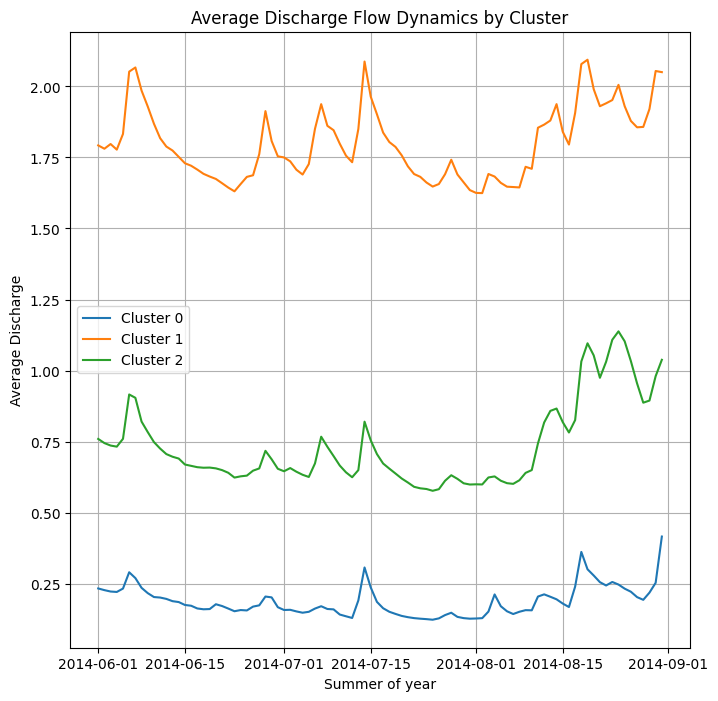

In [22]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Summer of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [24]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2014-06-01  0.598611  0.457331  0.316797  0.627606  0.418509  0.411992   
2014-06-02  0.589249  0.452549  0.314064  0.621490  0.412121  0.405703   
2014-06-03  0.584075  0.442093  0.308088  0.616098  0.408361  0.402002   
2014-06-04  0.580023  0.436333  0.304797  0.608509  0.402947  0.396673   
2014-06-05  0.593652  0.435768  0.304474  0.607088  0.405727  0.399409   
...              ...       ...       ...       ...       ...       ...   
2014-08-27  0.609515  0.464924  0.151140  0.585768  0.339004  0.333725   
2014-08-28  0.600059  0.455411  0.142544  0.570293  0.329625  0.324493   
2014-08-29  0.614643  0.442223  0.132268  0.565786  0.368085  0.362353   
2014-08-30  0.680005  0.486158  0.133115  0.608683  0.449044  0.442052   
2014-08-31  0.743086  0.641499  0.147500  0.655100  0.575700  0.566735   

             1000219  11000011  11000016  12000001  ...  66000034  67000017  \
2014-06-01  0.747031  0.513135  0.687438  0.360735  ...  0.127446  0.055929   
2014-06-02  0.725701  0.502431  0.671686  0.357974  ...  0.120953  0.055559   
2014-06-03  0.708087  0.489163  0.654242  0.359118  ...  0.119565  0.058312   
2014-06-04  0.695179  0.478210  0.638749  0.358032  ...  0.119568  0.067009   
2014-06-05  0.703409  0.472601  0.644600  0.400751  ...  0.119050  0.076461   
...              ...       ...       ...       ...  ...       ...       ...   
2014-08-27  0.365031  0.738262  0.890950  0.387675  ...  0.669456  0.665224   
2014-08-28  0.358209  0.731765  0.838905  0.374172  ...  0.587259  0.490338   
2014-08-29  0.358143  0.733584  0.843060  0.405493  ...  0.548920  0.356278   
2014-08-30  0.403261  0.753131  1.031525  0.788892  ...  0.546420  0.295544   
2014-08-31  0.391400  0.783616  1.256550  0.724113  ...  1.037909  0.707106   

            67000018  67000019  67000030   7000003   8000001   9000001  \
2014-06-01  0.077641  0.068824  0.113139  0.319665  0.439130  1.102743   
2014-06-02  0.073900  0.068369  0.107375  0.301816  0.418830  1.101744   
2014-06-03  0.069419  0.071756  0.106143  0.283651  0.398155  1.126712   
2014-06-04  0.077289  0.082458  0.106145  0.274386  0.387611  1.186018   
2014-06-05  0.075041  0.094089  0.105686  0.266863  0.379045  1.240942   
...              ...       ...       ...       ...       ...       ...   
2014-08-27  0.203671  0.536433  0.594304  0.319035  0.362488  0.893414   
2014-08-28  0.144561  0.487745  0.521334  0.301184  0.395346  0.877965   
2014-08-29  0.108111  0.438721  0.487299  0.304502  0.372159  0.936913   
2014-08-30  0.096441  0.412598  0.485080  0.330298  0.367439  1.122923   
2014-08-31  0.723130  0.708048  0.921395  0.490170  0.402024  1.272347   

             9000015  22000047  
2014-06-01  1.090942  0.480448  
2014-06-02  1.090028  0.478377  
2014-06-03  1.112856  0.476205  
2014-06-04  1.167076  0.473001  
2014-06-05  1.217291  0.511916  
...              ...       ...  
2014-08-27  0.899562  0.464529  
2014-08-28  0.885438  0.460217  
2014-08-29  0.939331  0.484108  
2014-08-30  1.109392  0.602438  
2014-08-31  1.246003  0.546126  

[92 rows x 260 columns]

<Axes: >

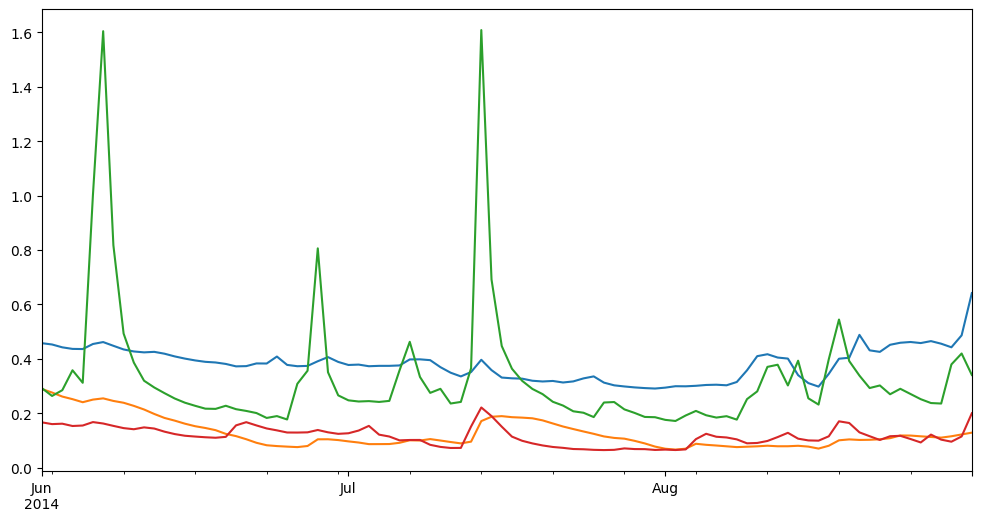

In [25]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

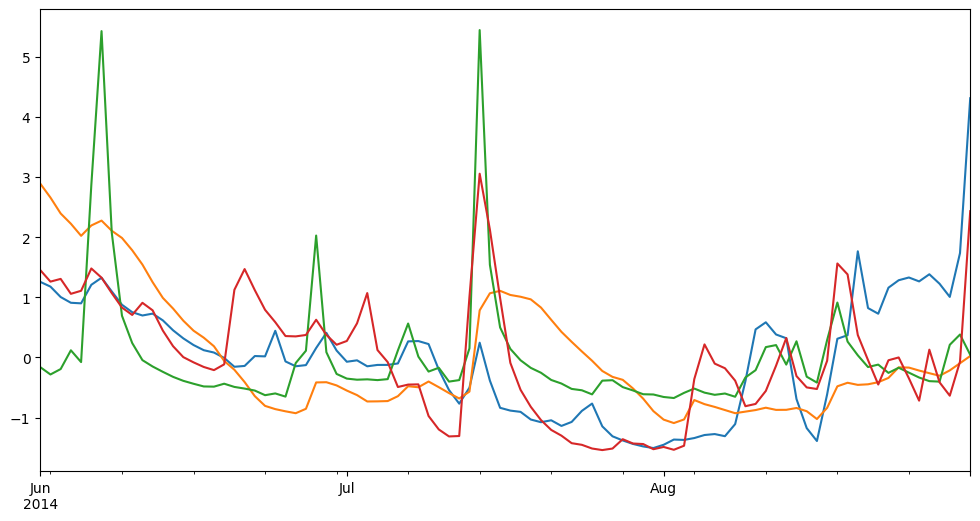

In [26]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

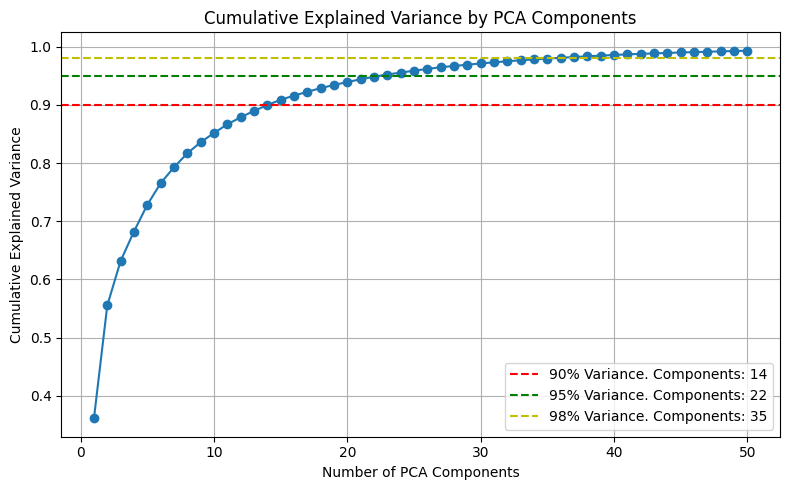

In [27]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[12.33579602, 13.87641798, -5.17072369, ...,  1.40627356,
         0.18438306, -0.41842784],
       [10.68101853, 13.23093112, -4.96847514, ...,  1.47570556,
         0.02839122, -0.07005327],
       [ 9.70409996, 12.7154696 , -4.78397302, ...,  0.4312437 ,
        -0.10361807,  0.85098739],
       ...,
       [ 5.35399058, -9.37130959, -2.79951182, ...,  0.6989439 ,
         0.21843013, -1.22004269],
       [14.44175487, -9.78816847, -1.22260136, ...,  0.3865469 ,
        -0.46338919,  0.17911218],
       [26.38294917, -7.97878208,  3.76986877, ...,  0.19787052,
         1.07178573,  0.51330929]], shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_56632\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


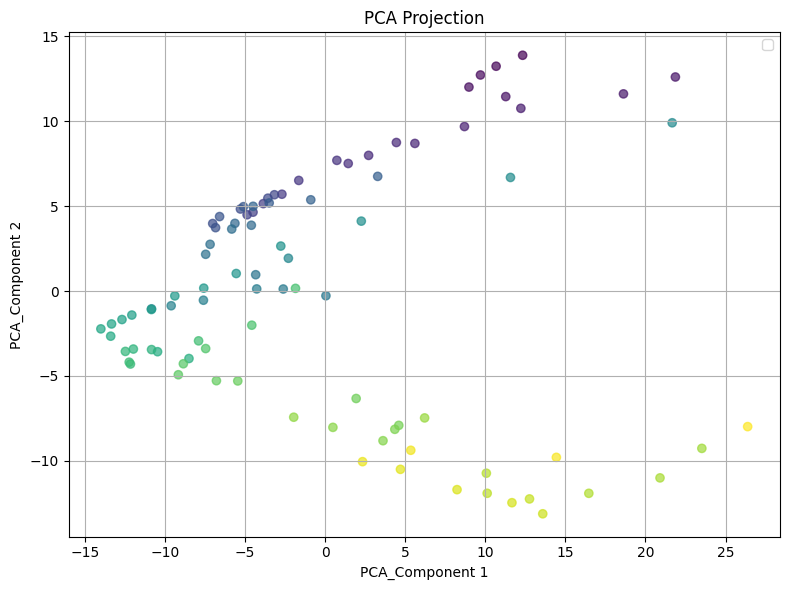

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_56632\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


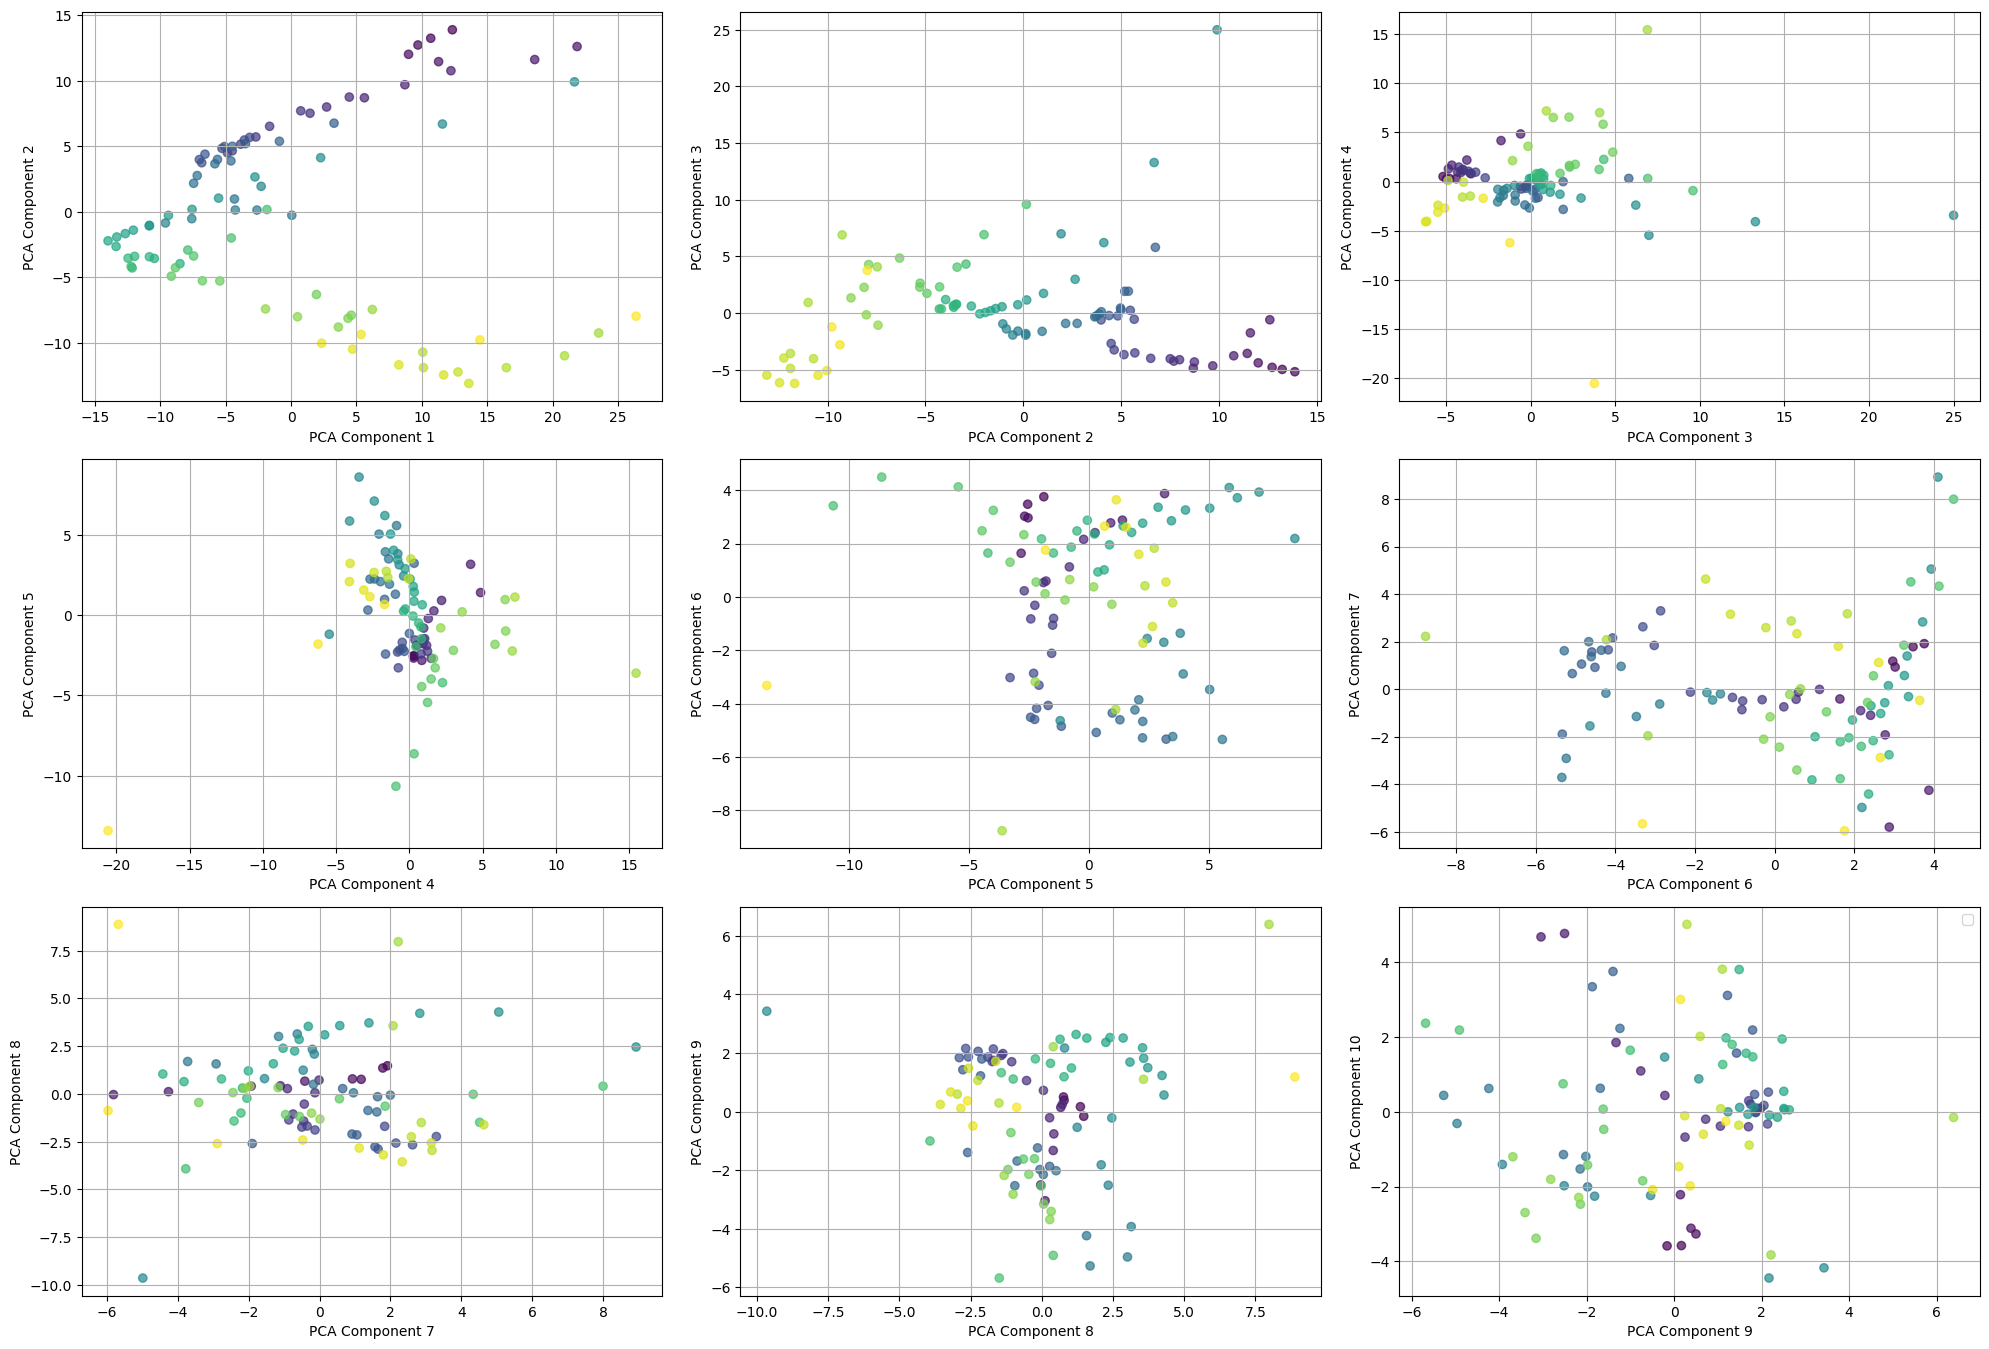

In [30]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [31]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.301
KMeans Davies-Bouldin Index is 1.431


<Axes: xlabel='k'>

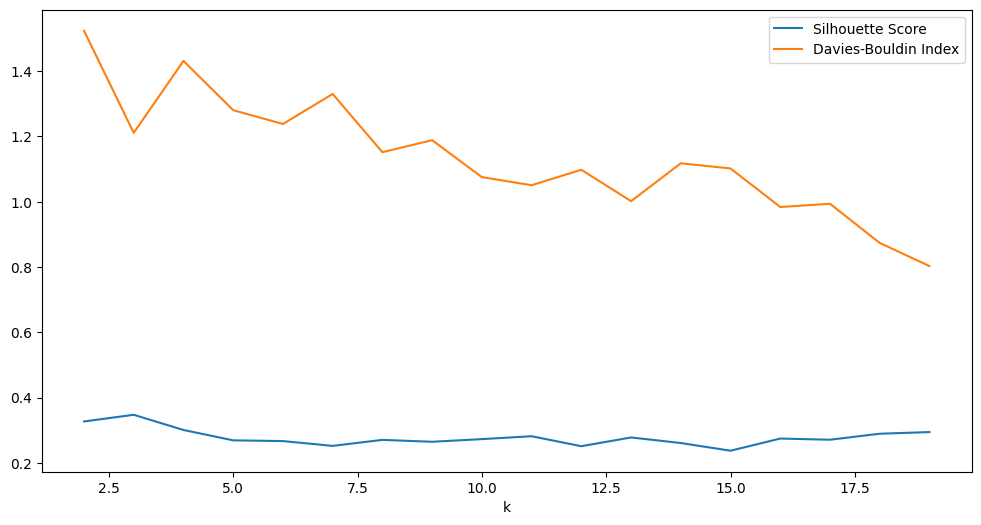

In [32]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         0     92               NaN   
3    1.27            3         0     92               NaN   
4    1.52            3         0     92               NaN   
5    1.78            3         1     89               NaN   
6    2.03            3         1     89               NaN   
7    2.29            3         4     77         -0.176956   
8    2.54            3         4     76         -0.170746   
9    2.80            3         6     66         -0.074702   
10   3.05            3         7     60         -0.041564   
11   3.31            3         8     56         -0.002199   
12   3.56            3         7     52          0.042083   
13   3.82            3         7     51          0.054270   
14   4.07            3         7     50          0.068743   
15   4.33            3         7     43          0.038893   
16   4.58            3         7     39          0.088663   
17   4.84            3         8     34          0.117610   
18   5.09            3         8     30          0.110429   
19   5.35            3         8     30          0.110429   
20   5.60            3         9     25          0.126068   
21   5.86            3         8     24          0.135374   
22   6.11            3         7     21          0.162170   
23   6.37            3         7     21          0.162170   
24   6.62            3         7     21          0.162170   
25   6.88            3         7     21          0.162170   
26   7.13            3         6     17          0.158465   
27   7.39            3         5     17          0.078988   
28   7.64            3         4     16          0.186291   
29   7.90            3         3     15          0.245262   
30   8.15            3         3     15          0.245262   
31   8.41            3         3     14          0.248861   
32   8.66            3         3     14          0.248861   
33   8.92            3         2     13          0.274174   
34   9.17            3         2     11          0.262487   
35   9.43            3         2     11          0.262487   
36   9.68            3         2     11          0.262487   
37   9.94            3         2     10          0.280266   
38  10.19            3         2     10          0.280266   
39  10.45            3         2     10          0.280266   
40  10.70            3         2      9          0.287205   
41  10.96            3         2      9          0.287205   
42  11.21            3         2      9          0.287205   
43  11.47            3         2      9          0.287205   
44  11.72            3         2      9          0.287205   
45  11.98            3         2      8          0.285737   
46  12.23            3         2      8          0.285737   
47  12.49            3         2      8          0.285737   
48  12.74            3         2      8          0.285737   
49  13.00            3         2      8          0.285737   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5                    NaN  
6                    NaN  
7               1.463522  
8               1.483636  
9               1.348406  
10              1.347868  
11              1.316730  
12              1.325860  
13              1.315789  
14              1.311776  
15              1.449235  
16              1.465465  
17              1.400652  
18              1.347126  
19              1.347126  
20              1.450953  
21              1.491883  
22              1.536527  
23              1.536527  
24              1.536527  
25              1.536527  
26              1.569976  
27              1.604019  
28              1.695934  
29              1.670749  
30              1.670749  
31              1.621814  
32 

<Axes: xlabel='eps'>

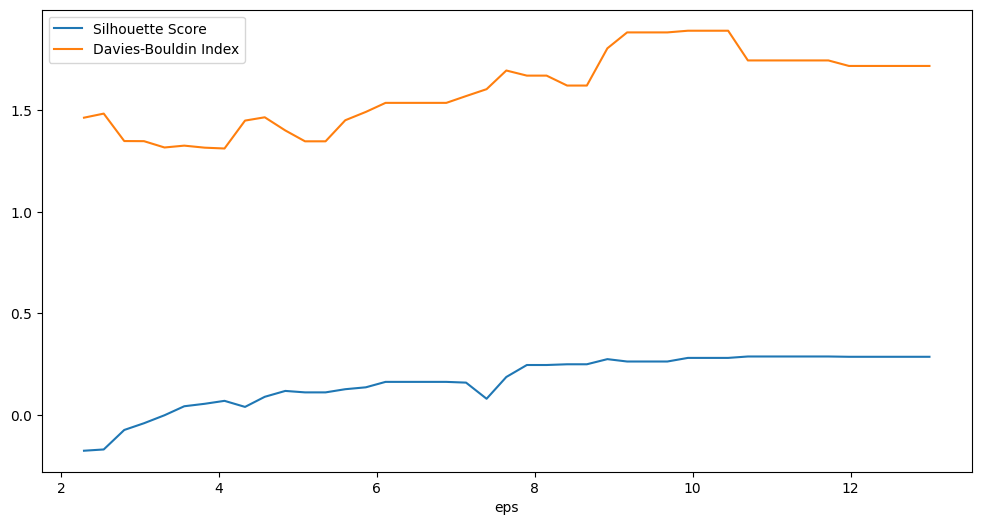

In [33]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

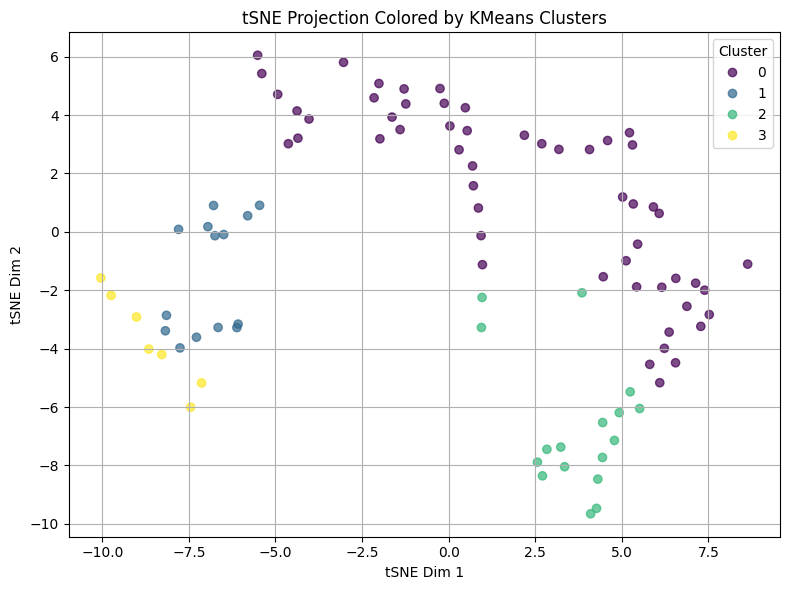

In [34]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         6    248          0.994408   
1    0.05            2         7    246          0.992642   
2    0.06            2         8    243          0.985931   
3    0.06            2         8    243          0.985931   
4    0.07            2         8    243          0.985931   
..    ...          ...       ...    ...               ...   
195  0.98            2        14     62          0.046783   
196  0.99            2        14     62          0.046783   
197  0.99            2        14     62          0.046783   
198  1.00            2        14     61          0.046499   
199  1.00            2        14     61          0.046499   

     Davies-Bouldin Index  
0                0.007252  
1                0.008075  
2                0.015998  
3                0.015998  
4                0.015998  
..                    ...  
195              0.612605  
196              0.612605  
197              0.612605  
198              0.612063  
199              0.612063  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

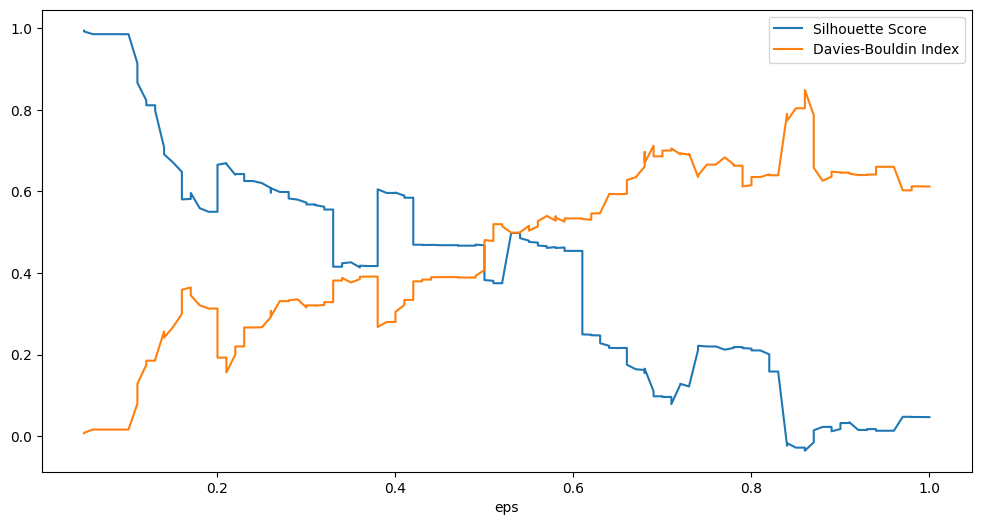

In [35]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Fall (3)

In [36]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [37]:
#Start with spring and work our way down to winter
season = 3
season_year = 2014
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] 
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2014-09-01 to 2014-11-30
Columns: 263 entries, 10000009 to 22000047
dtypes: float64(263)
memory usage: 187.7 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2014-09-01  0.810350  0.658315  0.142704  0.664850  0.544974  0.536488   
2014-09-02  0.826059  0.562901  0.129852  0.623808  0.512025  0.504052   
2014-09-03  0.722118  0.504651  0.124415  0.600850  0.481900  0.474396   
2014-09-04  0.650666  0.483974  0.116475  0.585932  0.467506  0.460226   
2014-09-05  0.614351  0.476848  0.113880  0.564211  0.493498  0.485813   
...              ...       ...       ...       ...       ...       ...   
2014-11-26  1.234218  0.650755  0.852486  0.961165  0.595382  0.586111   
2014-11-27  1.075872  0.555762  0.702150  0.890700  0.549149  0.540598   
2014-11-28  1.011236  0.490473  0.610544  0.834122  0.508711  0.500790   
2014-11-29  0.970404  0.465276  0.563207  0.812663  0.494452  0.486752   
2014-11-30  0.939100  0.447413  0.535669  0.786723  0.471874  0.464526   

             1000219  11000011  11000016  12000001  ...  66000034  67000017  \
2014-09-01  0.383160  0.796715  

          2014-09-01  2014-09-02  2014-09-03  2014-09-04  2014-09-05  \
10000009    0.257820    0.463727    0.392681    0.328052    0.293440   
10000010    0.018895    0.001733   -0.013896    0.004950    0.021336   
10000011   -0.791391   -0.758517   -0.724787   -0.707378   -0.696939   
10000014    0.029166    0.108660    0.165957    0.202577    0.194218   
10000016   -0.159220   -0.087584   -0.056431   -0.026970    0.054285   
...              ...         ...         ...         ...         ...   
7000003    -0.067471   -0.051044   -0.112444   -0.158707   -0.201719   
8000001    -0.375979   -0.278376   -0.227577   -0.199544   -0.186838   
9000001     0.922006    1.305178    1.486011    1.240693    1.148473   
9000015     0.885909    1.253960    1.431218    1.214701    1.134675   
22000047   -0.227048   -0.160031   -0.107663   -0.042928   -0.010150   

          2014-09-06  2014-09-07  2014-09-08  2014-09-09  2014-09-10  ...  \
10000009    0.213844    0.032226    0.032513    0.072706  

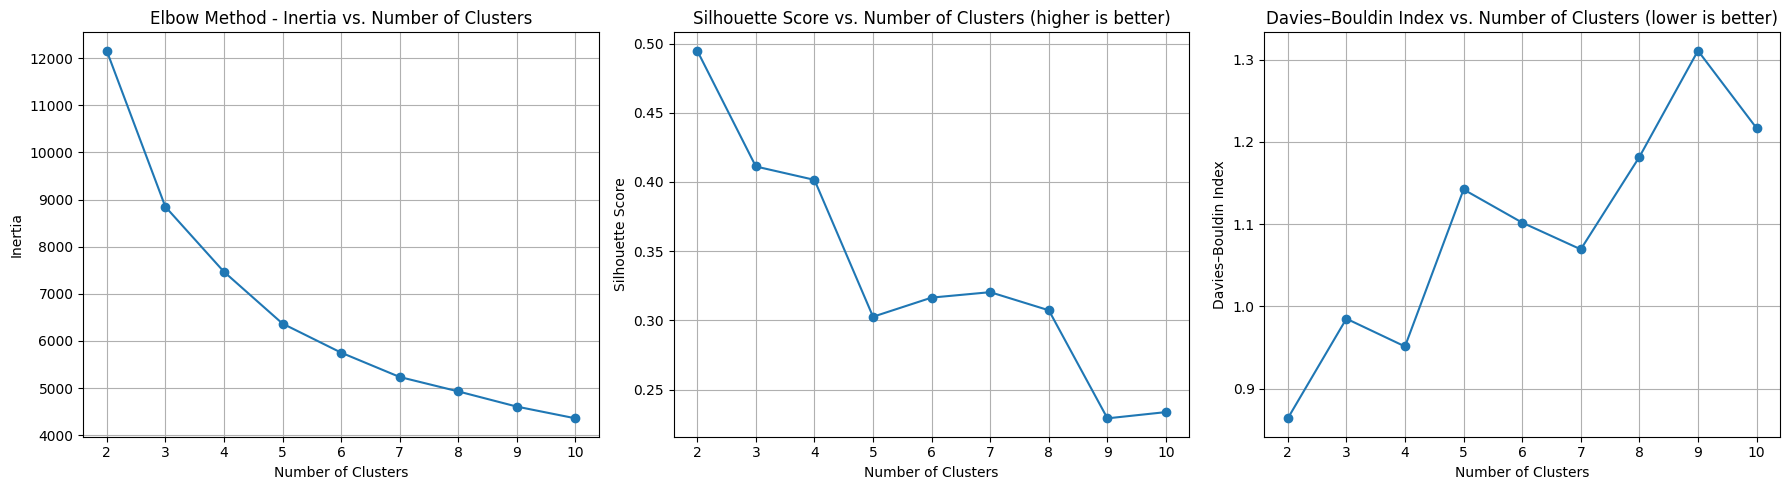

In [38]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        2
10000011        2
10000014        0
10000016        2

            10000009  10000010  10000011  10000014  10000016  10000017  \
2014-09-01  0.810350  0.658315  0.142704  0.664850  0.544974  0.536488   
2014-09-02  0.826059  0.562901  0.129852  0.623808  0.512025  0.504052   
2014-09-03  0.722118  0.504651  0.124415  0.600850  0.481900  0.474396   
2014-09-04  0.650666  0.483974  0.116475  0.585932  0.467506  0.460226   
2014-09-05  0.614351  0.476848  0.113880  0.564211  0.493498  0.485813   
...              ...       ...       ...       ...       ...       ...   
2014-11-26  1.234218  0.650755  0.852486  0.961165  0.595382  0.586111   
2014-11-27  1.075872  0.555762  0.702150  0.890700  0.549149  0.540598   
2014-11-28  1.011236  0.490473  0.610544  0.834122  0.508711  0.500790   
2014-11-29  0.970404  0.465276  0.563207  0.812663  0.494452  0.486752   
2014-11-30  0.939100  0.447413  0.535669  0.786723  0.471874  0.464526   

             1000219  11000011  11000016  12000001  ...  66000034  67000017  \
2014-09-01  0.383160  0.796715  

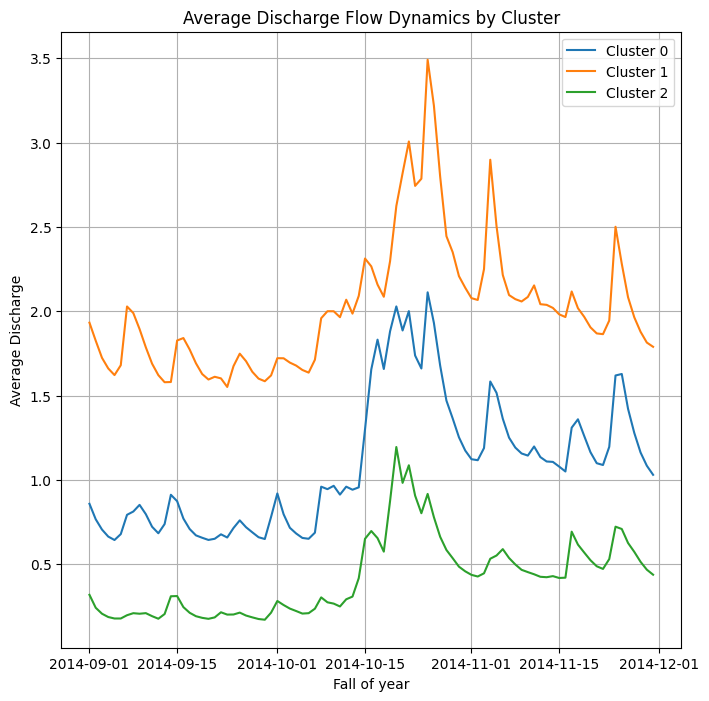

In [39]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Fall of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [41]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2014-09-01  0.810350  0.658315  0.142704  0.664850  0.544974  0.536488   
2014-09-02  0.826059  0.562901  0.129852  0.623808  0.512025  0.504052   
2014-09-03  0.722118  0.504651  0.124415  0.600850  0.481900  0.474396   
2014-09-04  0.650666  0.483974  0.116475  0.585932  0.467506  0.460226   
2014-09-05  0.614351  0.476848  0.113880  0.564211  0.493498  0.485813   
...              ...       ...       ...       ...       ...       ...   
2014-11-26  1.234218  0.650755  0.852486  0.961165  0.595382  0.586111   
2014-11-27  1.075872  0.555762  0.702150  0.890700  0.549149  0.540598   
2014-11-28  1.011236  0.490473  0.610544  0.834122  0.508711  0.500790   
2014-11-29  0.970404  0.465276  0.563207  0.812663  0.494452  0.486752   
2014-11-30  0.939100  0.447413  0.535669  0.786723  0.471874  0.464526   

             1000219  11000011  11000016  12000001  ...  66000034  67000017  \
2014-09-01  0.383160  0.796715  1.087919  0.601329  ...  0.820832  1.230364   
2014-09-02  0.382723  0.804913  0.965278  0.510562  ...  0.635879  0.778394   
2014-09-03  0.368105  0.805433  0.893991  0.459506  ...  0.573469  0.542011   
2014-09-04  0.355624  0.797345  0.872995  0.436814  ...  0.544247  0.396185   
2014-09-05  0.344975  0.792582  0.845148  0.419795  ...  0.518416  0.322862   
...              ...       ...       ...       ...  ...       ...       ...   
2014-11-26  1.188827  1.961338  2.472948  0.834132  ...  0.631818  0.762511   
2014-11-27  1.204840  1.956500  2.127034  0.709785  ...  0.583760  0.690136   
2014-11-28  1.180994  1.926305  1.900111  0.614010  ...  0.549427  0.628135   
2014-11-29  1.140665  1.877048  1.752092  0.550889  ...  0.516599  0.590992   
2014-11-30  1.092380  1.814574  1.654670  0.504594  ...  0.492491  0.550480   

            67000018  67000019  67000030   7000003   8000001   9000001  \
2014-09-01  0.767453  0.882397  0.728688  0.603357  0.407044  1.232993   
2014-09-02  0.409620  0.704229  0.564497  0.532839  0.403347  1.305360   
2014-09-03  0.274203  0.613858  0.509093  0.451941  0.390359  1.306910   
2014-09-04  0.204381  0.539850  0.483152  0.399541  0.378473  1.121509   
2014-09-05  0.165674  0.473969  0.460220  0.364131  0.371651  1.046428   
...              ...       ...       ...       ...       ...       ...   
2014-11-26  1.159704  1.087306  0.560892  2.292562  2.032444  2.693399   
2014-11-27  0.948666  1.060753  0.518228  1.884553  1.715009  2.413627   
2014-11-28  0.782725  1.013125  0.487750  1.477502  1.469366  2.203944   
2014-11-29  0.656812  0.954135  0.458607  1.232805  1.309936  2.041693   
2014-11-30  0.576534  0.893288  0.437205  1.064501  1.196770  1.940885   

             9000015  22000047  
2014-09-01  1.210023  0.501813  
2014-09-02  1.276186  0.470758  
2014-09-03  1.277602  0.454497  
2014-09-04  1.108099  0.459273  
2014-09-05  1.039456  0.460937  
...              ...       ...  
2014-11-26  2.545206  0.571123  
2014-11-27  2.289423  0.541988  
2014-11-28  2.097720  0.524222  
2014-11-29  1.949381  0.514419  
2014-11-30  1.857217  0.508434  

[91 rows x 263 columns]

<Axes: >

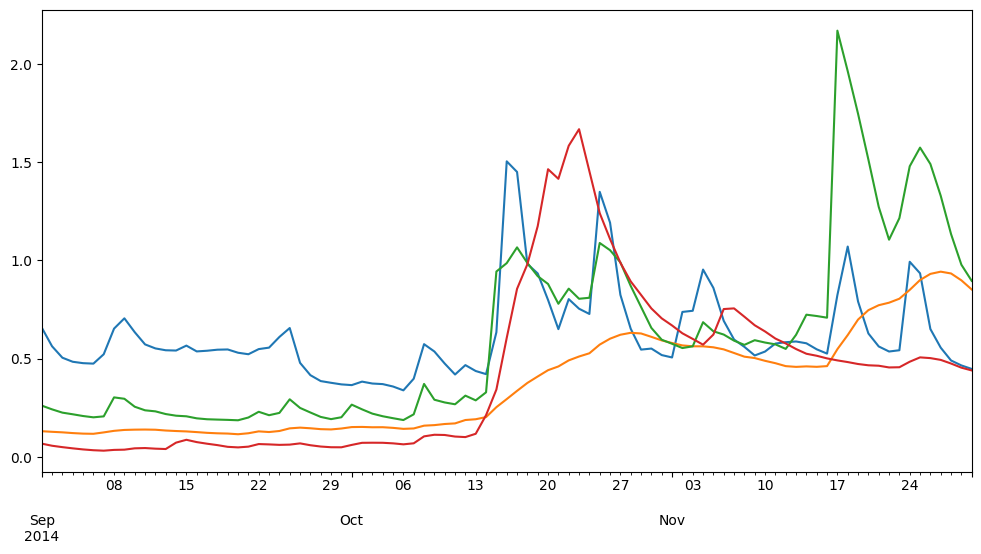

In [42]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

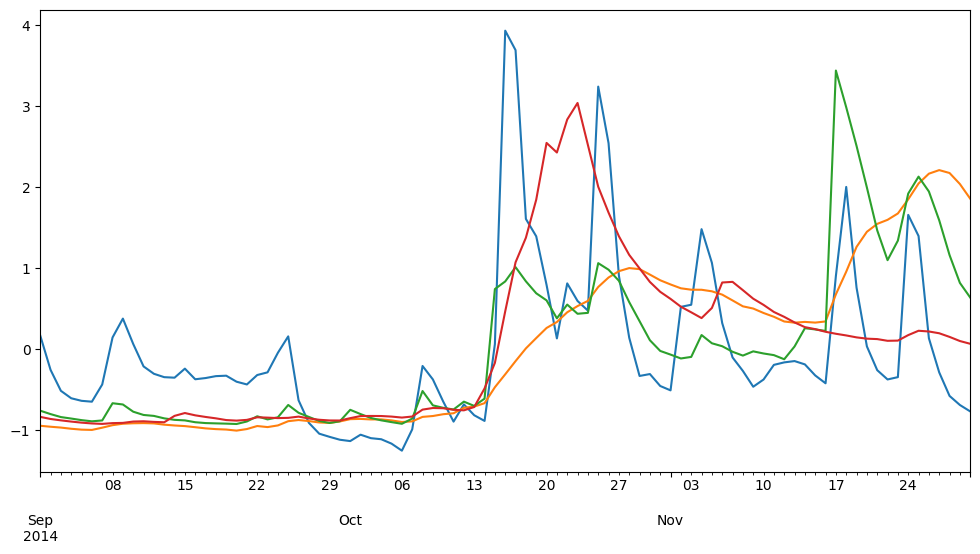

In [43]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

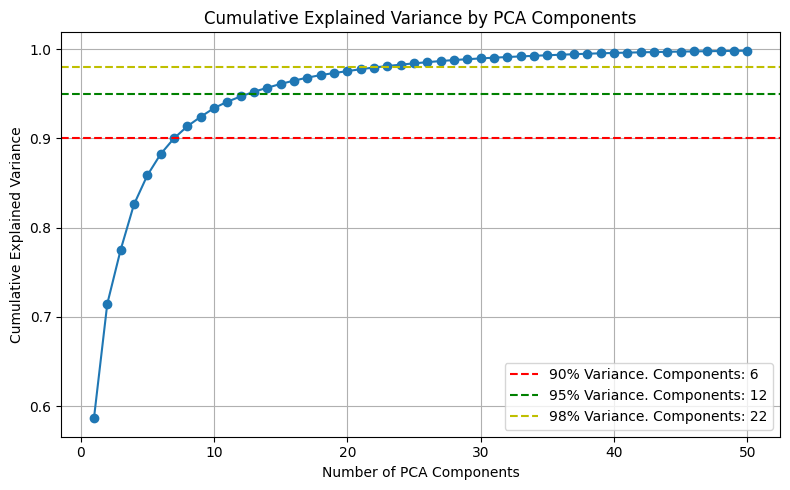

In [44]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ -6.67654921,   5.80663502,   2.86046096, ...,   1.09017505,
         -1.35216984,  -0.74078396],
       [-10.0487855 ,   3.60410702,   1.36205876, ...,   0.93536438,
         -0.35847538,  -0.09830598],
       [-12.1752366 ,   2.54073161,   0.68893923, ...,   0.53317978,
          0.56524502,  -0.03037194],
       ...,
       [  6.27535083,  -6.59315242,  -0.1067458 , ...,  -0.66500949,
         -0.35937531,  -1.35426047],
       [  3.7012452 ,  -6.0296063 ,  -0.37225722, ...,  -1.10208227,
         -0.4073583 ,  -1.90896668],
       [  2.03267198,  -5.63169125,  -0.53525754, ...,  -1.0082028 ,
         -0.35315871,  -2.08945836]], shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_56632\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


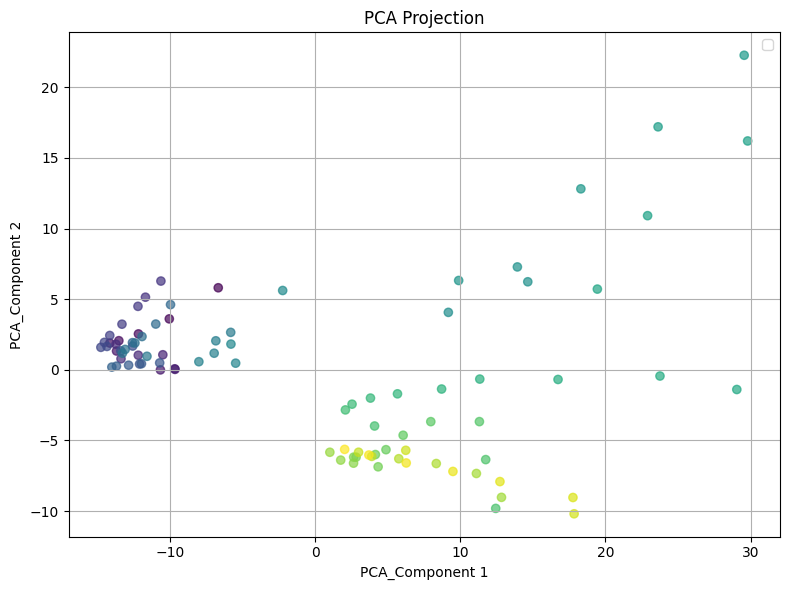

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_56632\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


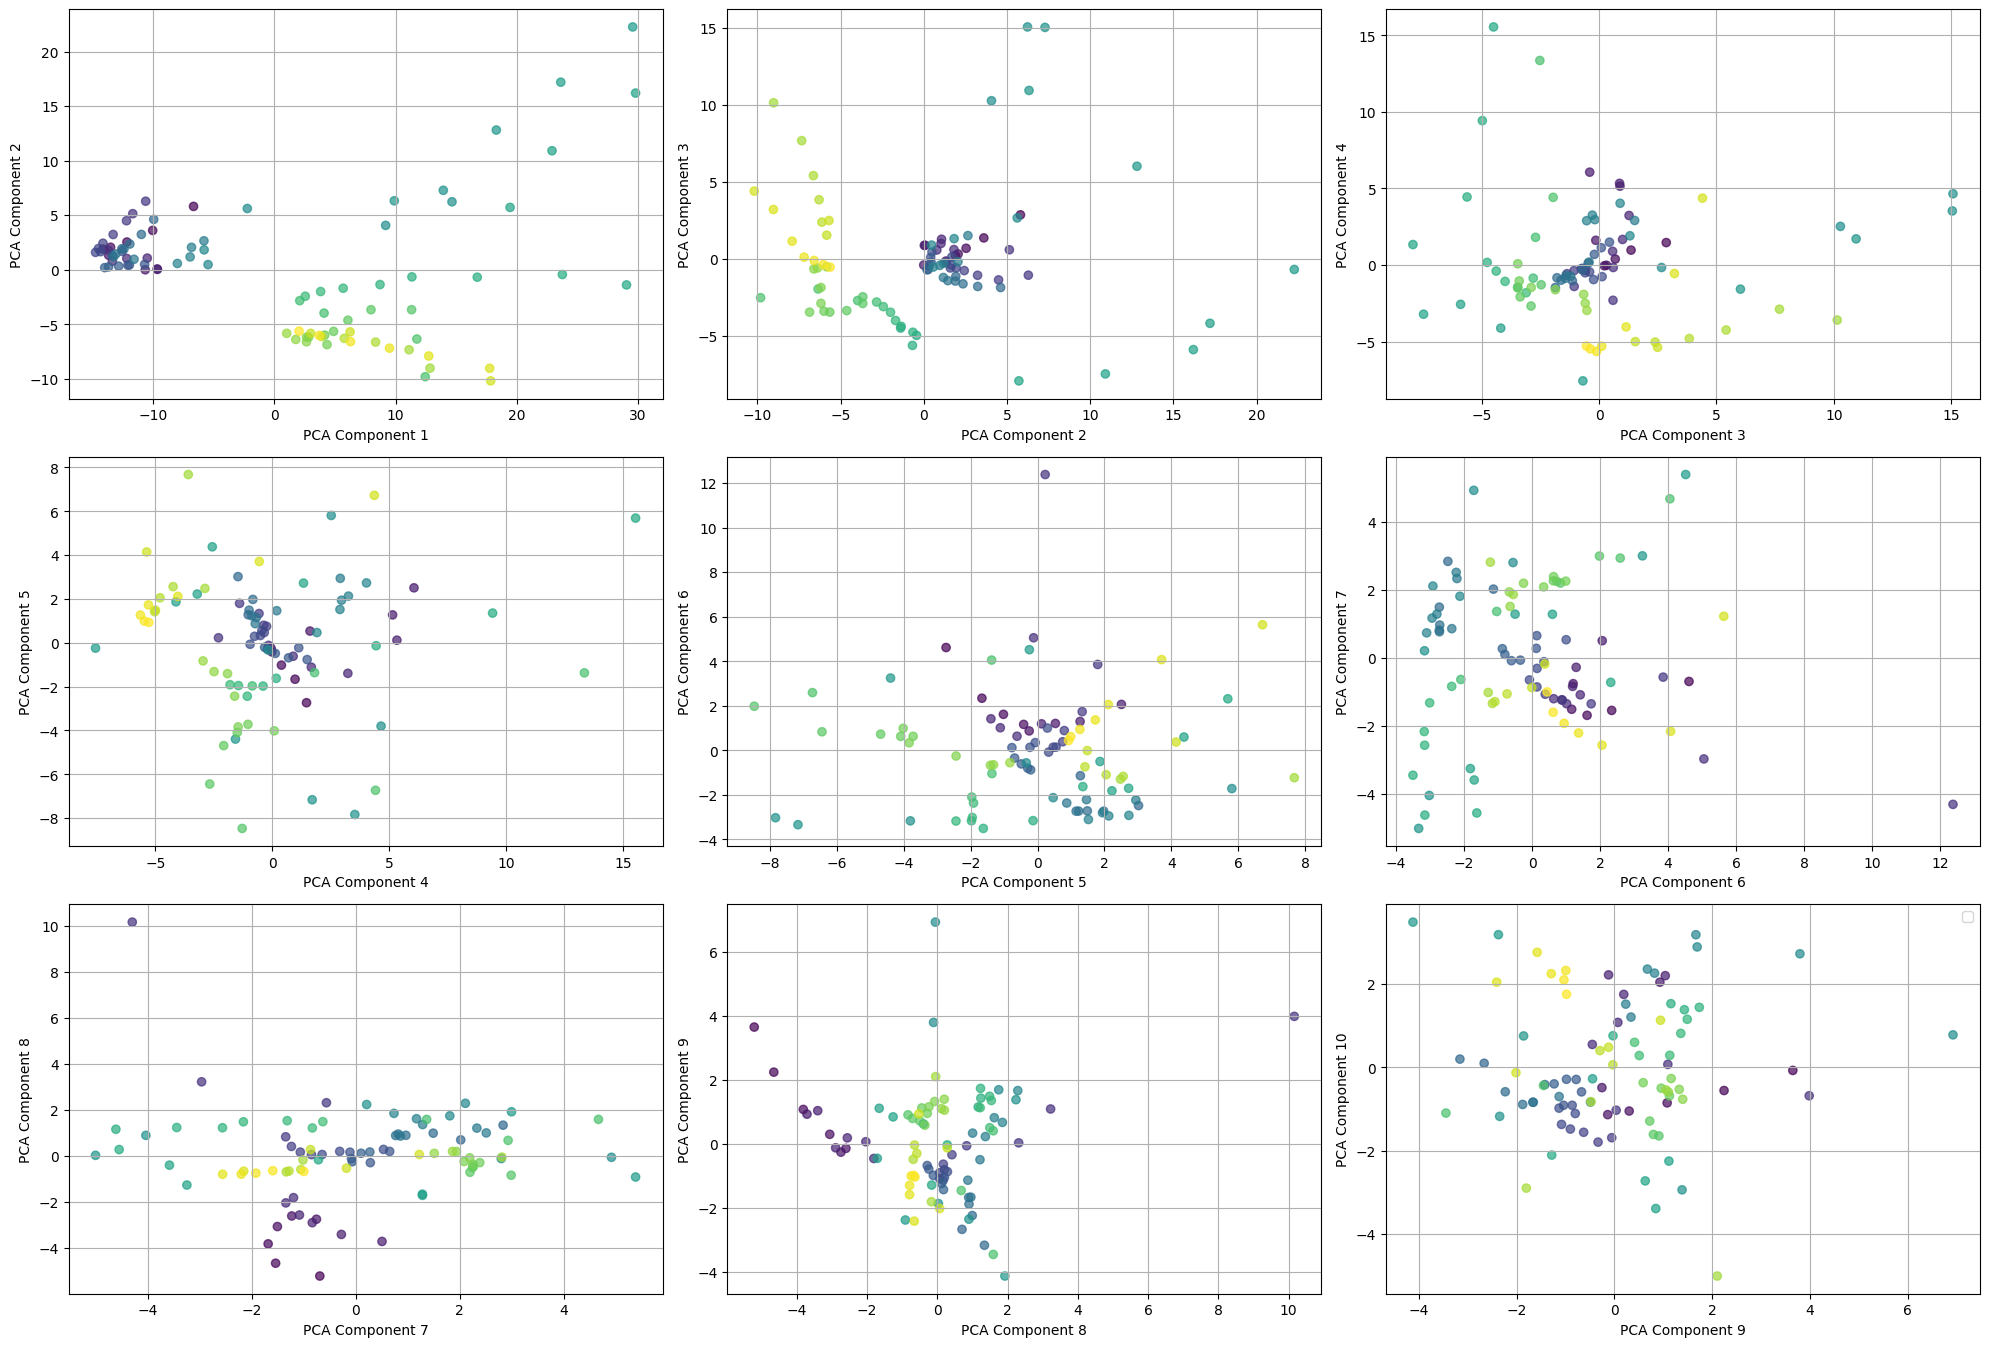

In [47]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [48]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.313
KMeans Davies-Bouldin Index is 1.365


<Axes: xlabel='k'>

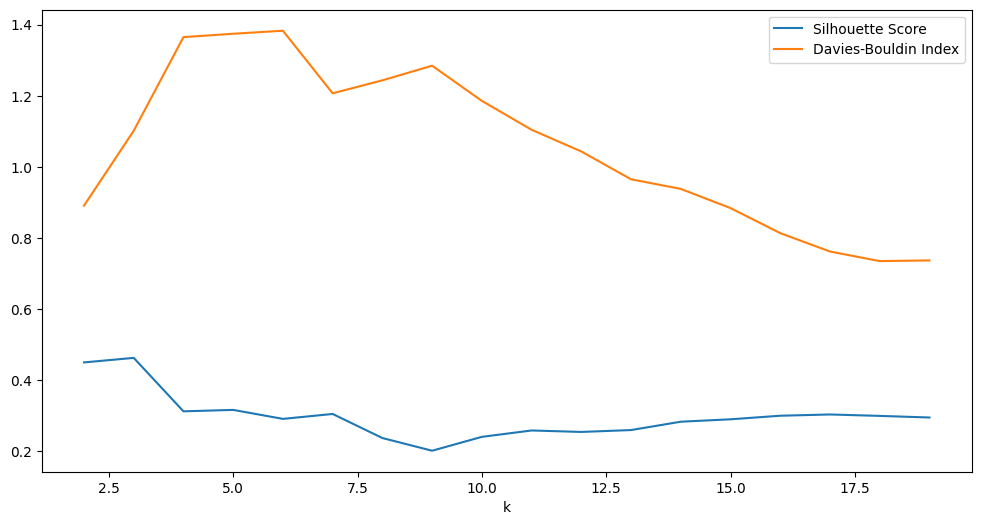

In [49]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     91               NaN   
1    0.76            3         0     91               NaN   
2    1.01            3         0     91               NaN   
3    1.27            3         3     81         -0.076053   
4    1.52            3         4     77         -0.289949   
5    1.78            3         4     75         -0.263360   
6    2.03            3         5     70         -0.226979   
7    2.29            3         7     61         -0.156876   
8    2.54            3         6     54         -0.068923   
9    2.80            3         7     49         -0.027298   
10   3.05            3         8     42          0.028290   
11   3.31            3         8     40          0.045680   
12   3.56            3         8     34          0.090932   
13   3.82            3         7     30          0.108393   
14   4.07            3         6     29          0.178616   
15   4.33            3         6     27          0.186343   
16   4.58            3         6     26          0.193580   
17   4.84            3         6     25          0.200553   
18   5.09            3         6     25          0.200553   
19   5.35            3         6     24          0.208520   
20   5.60            3         5     22          0.221131   
21   5.86            3         5     22          0.221131   
22   6.11            3         4     22          0.180393   
23   6.37            3         4     21          0.181036   
24   6.62            3         4     21          0.181036   
25   6.88            3         4     21          0.181036   
26   7.13            3         2     20          0.417506   
27   7.39            3         2     20          0.417506   
28   7.64            3         2     18          0.426923   
29   7.90            3         2     18          0.426923   
30   8.15            3         2     18          0.426923   
31   8.41            3         2     17          0.434928   
32   8.66            3         2     16          0.436525   
33   8.92            3         2     15          0.440825   
34   9.17            3         2     15          0.440825   
35   9.43            3         2     14          0.438462   
36   9.68            3         2     14          0.438462   
37   9.94            3         2     13          0.445811   
38  10.19            3         3      9          0.447946   
39  10.45            3         3      9          0.447946   
40  10.70            3         3      9          0.447946   
41  10.96            3         3      9          0.447946   
42  11.21            3         3      9          0.447946   
43  11.47            3         3      9          0.447946   
44  11.72            3         2      9          0.426125   
45  11.98            3         2      8          0.431160   
46  12.23            3         2      5          0.314829   
47  12.49            3         2      5          0.314829   
48  12.74            3         2      4          0.305186   
49  13.00            3         2      4          0.305186   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3               1.007928  
4               1.446395  
5               1.442882  
6               1.710303  
7               1.682674  
8               1.630427  
9               1.473433  
10              1.648198  
11              1.690488  
12              1.627857  
13              1.618226  
14              1.614921  
15              1.563373  
16              1.493079  
17              1.474331  
18              1.474331  
19              1.483962  
20              1.461293  
21              1.461293  
22              1.489337  
23              1.422301  
24              1.422301  
25              1.422301  
26              1.431624  
27              1.431624  
28              1.387414  
29              1.387414  
30              1.387414  
31              1.366186  
32 

<Axes: xlabel='eps'>

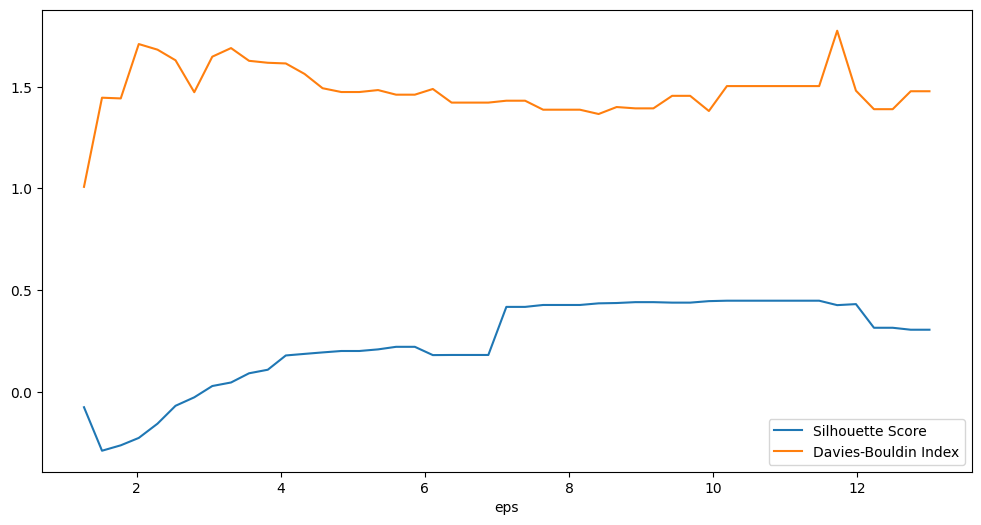

In [50]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

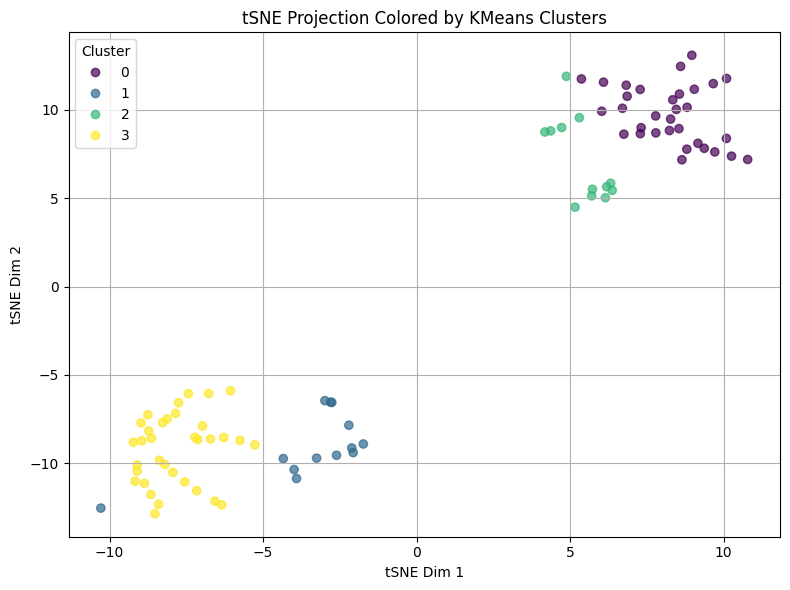

In [51]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         6    251          0.988551   
1    0.05            2         6    251          0.988551   
2    0.06            2         6    251          0.988551   
3    0.06            2         6    251          0.988551   
4    0.07            2         7    249          0.988749   
..    ...          ...       ...    ...               ...   
195  0.98            2        27    135          0.339629   
196  0.99            2        27    135          0.339629   
197  0.99            2        28    133          0.343906   
198  1.00            2        29    131          0.345552   
199  1.00            2        30    129          0.348920   

     Davies-Bouldin Index  
0                0.013471  
1                0.013471  
2                0.013471  
3                0.013471  
4                0.012737  
..                    ...  
195              0.552372  
196              0.552372  
197              0.550037  
198              0.549959  
199              0.546597  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

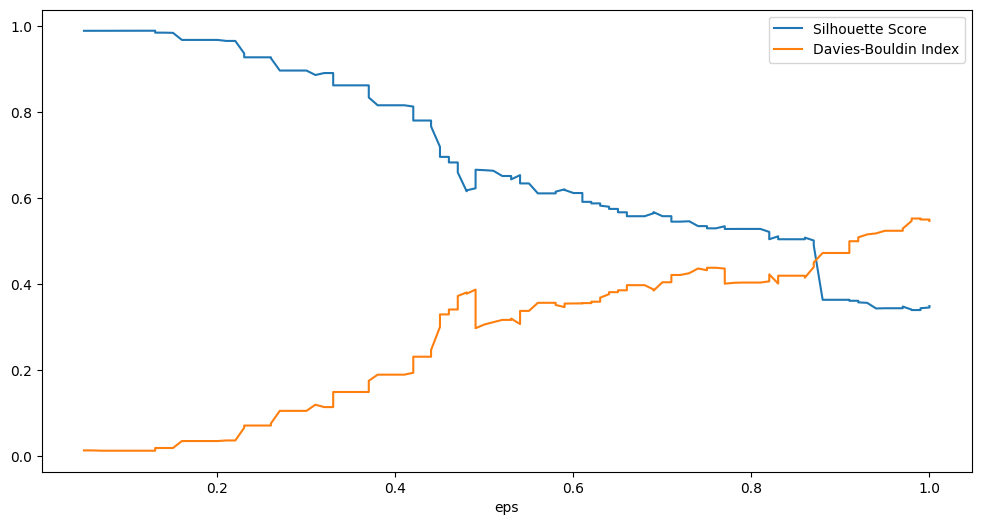

In [52]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Winter (4)

In [53]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [54]:
season = 4
season_year = 2014
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] 
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2014-12-01 to 2015-02-28
Columns: 245 entries, 10000009 to 9000015
dtypes: float64(245)
memory usage: 173.0 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2014-12-01  0.916490  0.430773  0.512847  0.764783  0.460533  0.453361   
2014-12-02  0.899142  0.427735  0.498739  0.758576  0.449967  0.442960   
2014-12-03  0.884159  0.415321  0.485352  0.750398  0.441143  0.434274   
2014-12-04  0.875967  0.415218  0.478467  0.746931  0.438950  0.432115   
2014-12-05  0.929999  0.585566  0.805899  0.818139  0.617292  0.607679   
...              ...       ...       ...       ...       ...       ...   
2015-02-24  1.507640  1.080341  1.097221  1.144173  0.735976  0.724516   
2015-02-25  1.754997  1.223831  1.465129  1.213224  0.744733  0.733136   
2015-02-26  1.483979  1.013789  1.153044  1.107306  0.691622  0.680853   
2015-02-27  1.579028  1.244886  1.314733  1.303126  0.856737  0.843396   
2015-02-28  1.723520  1.120765  1.195805  1.218281  0.734075  0.722644   

            11000011  11000016  12000001  12000195  ...  64000025  66000014  \
2014-12-01  1.763059  1.570611  

          2014-12-01  2014-12-02  2014-12-03  2014-12-04  2014-12-05  \
10000009    0.403198    0.409900    0.426601    0.437664    0.396274   
10000010   -0.521995   -0.498285   -0.482629   -0.465249   -0.254816   
10000011   -0.365659   -0.361493   -0.346816   -0.341301    0.161686   
10000014    0.114226    0.139093    0.167195    0.184796    0.184822   
10000016   -0.465308   -0.455454   -0.432550   -0.418741   -0.194845   
...              ...         ...         ...         ...         ...   
67000030   -0.540561   -0.530099   -0.508687   -0.476964   -0.570379   
7000003     0.450560    0.343153    0.275878    0.220620    0.845503   
8000001     0.769851    0.708163    0.645758    0.614591    1.094766   
9000001     2.242488    2.230543    2.239638    2.246236    2.138537   
9000015     2.092718    2.085329    2.097639    2.106138    1.994837   

          2014-12-06  2014-12-07  2014-12-08  2014-12-09  2014-12-10  ...  \
10000009    0.519577    0.310462    0.117301    0.214606  

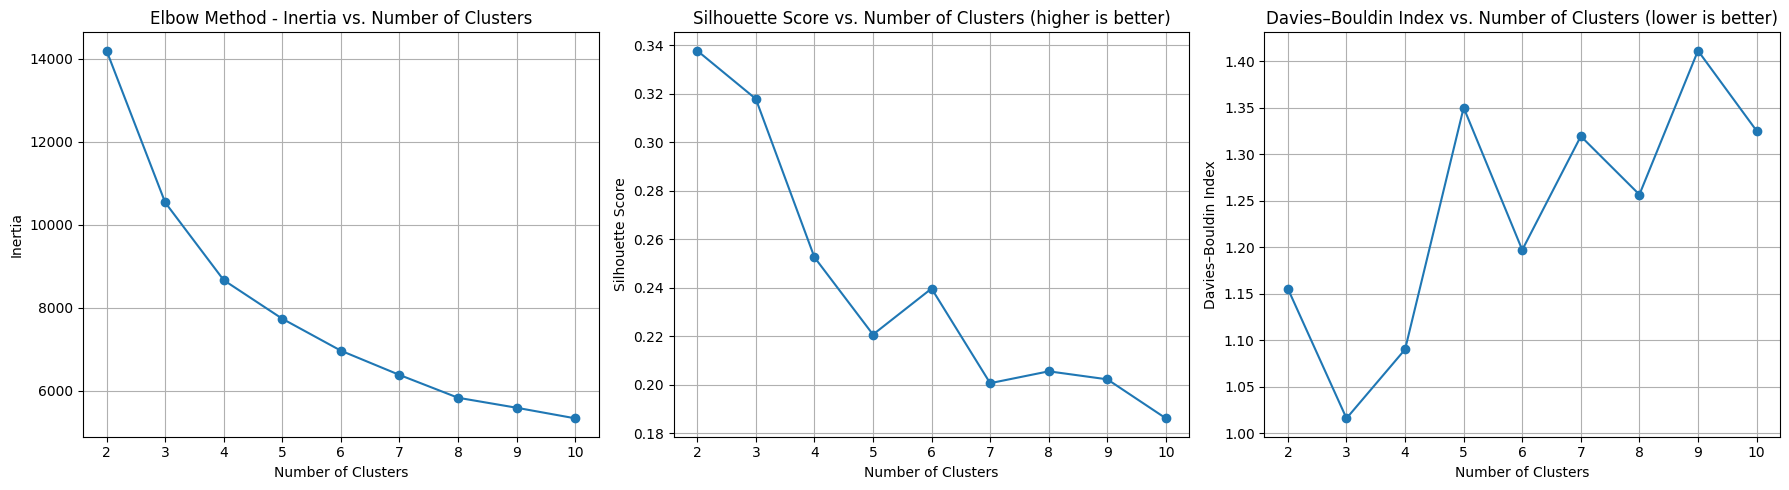

In [55]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2014-12-01  0.916490  0.430773  0.512847  0.764783  0.460533  0.453361   
2014-12-02  0.899142  0.427735  0.498739  0.758576  0.449967  0.442960   
2014-12-03  0.884159  0.415321  0.485352  0.750398  0.441143  0.434274   
2014-12-04  0.875967  0.415218  0.478467  0.746931  0.438950  0.432115   
2014-12-05  0.929999  0.585566  0.805899  0.818139  0.617292  0.607679   
...              ...       ...       ...       ...       ...       ...   
2015-02-24  1.507640  1.080341  1.097221  1.144173  0.735976  0.724516   
2015-02-25  1.754997  1.223831  1.465129  1.213224  0.744733  0.733136   
2015-02-26  1.483979  1.013789  1.153044  1.107306  0.691622  0.680853   
2015-02-27  1.579028  1.244886  1.314733  1.303126  0.856737  0.843396   
2015-02-28  1.723520  1.120765  1.195805  1.218281  0.734075  0.722644   

            11000011  11000016  12000001  12000195  ...  64000025  66000014  \
2014-12-01  1.763059  1.570611  

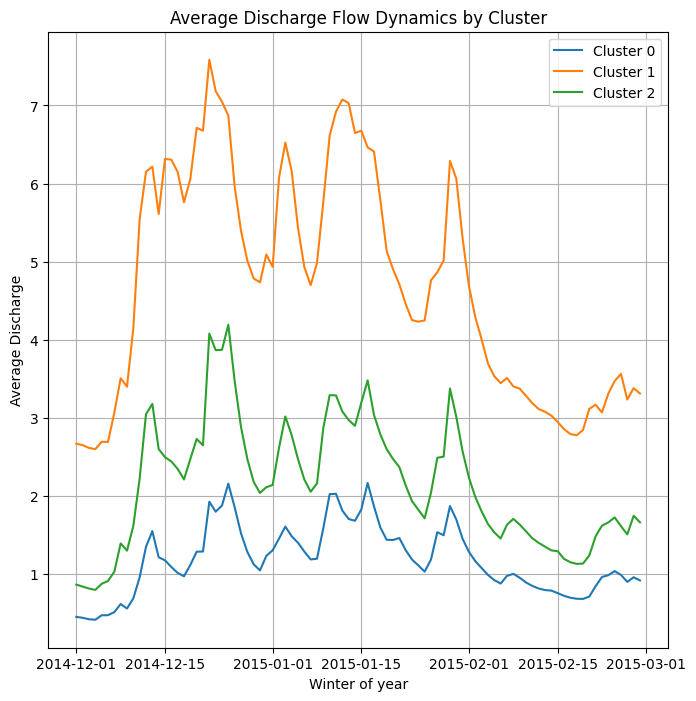

In [56]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Winter of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [58]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2014-12-01  0.916490  0.430773  0.512847  0.764783  0.460533  0.453361   
2014-12-02  0.899142  0.427735  0.498739  0.758576  0.449967  0.442960   
2014-12-03  0.884159  0.415321  0.485352  0.750398  0.441143  0.434274   
2014-12-04  0.875967  0.415218  0.478467  0.746931  0.438950  0.432115   
2014-12-05  0.929999  0.585566  0.805899  0.818139  0.617292  0.607679   
...              ...       ...       ...       ...       ...       ...   
2015-02-24  1.507640  1.080341  1.097221  1.144173  0.735976  0.724516   
2015-02-25  1.754997  1.223831  1.465129  1.213224  0.744733  0.733136   
2015-02-26  1.483979  1.013789  1.153044  1.107306  0.691622  0.680853   
2015-02-27  1.579028  1.244886  1.314733  1.303126  0.856737  0.843396   
2015-02-28  1.723520  1.120765  1.195805  1.218281  0.734075  0.722644   

            11000011  11000016  12000001  12000195  ...  64000025  66000014  \
2014-12-01  1.763059  1.570611  0.469978  0.676582  ...  0.138879  0.348869   
2014-12-02  1.702889  1.488422  0.448609  0.729726  ...  0.128120  0.324995   
2014-12-03  1.647995  1.433728  0.425984  1.020588  ...  0.115707  0.290016   
2014-12-04  1.594498  1.425973  0.419096  0.932207  ...  0.105963  0.258430   
2014-12-05  1.556173  1.428784  0.462064  0.988647  ...  0.108009  0.254107   
...              ...       ...       ...       ...  ...       ...       ...   
2015-02-24  1.789761  2.388760  1.024665  1.315513  ...  0.692037  0.785653   
2015-02-25  1.878434  2.631169  0.992677  1.386460  ...  0.645739  0.724647   
2015-02-26  1.895010  2.113847  0.870627  0.750878  ...  0.624592  0.694097   
2015-02-27  1.926154  1.961248  1.044610  0.847091  ...  0.643087  0.704522   
2015-02-28  1.932675  1.941750  0.907757  0.896872  ...  0.589931  0.669624   

            67000017  67000018  67000019  67000030   7000003   8000001  \
2014-12-01  0.529281  0.491199  0.842173  0.421026  0.941354  1.108979   
2014-12-02  0.488049  0.441620  0.796838  0.411221  0.864497  1.053961   
2014-12-03  0.491088  0.380988  0.752724  0.401884  0.806440  0.997166   
2014-12-04  0.482244  0.347959  0.724123  0.409239  0.765211  0.966252   
2014-12-05  0.791434  0.343674  0.710063  0.418630  1.167645  1.299508   
...              ...       ...       ...       ...       ...       ...   
2015-02-24  1.051340  1.175427  1.155021  1.275946  1.542713  1.372046   
2015-02-25  0.956732  1.025094  1.059702  1.257072  1.516305  1.641417   
2015-02-26  0.876247  0.925435  1.007554  1.181072  1.395358  1.655866   
2015-02-27  0.855264  0.881611  0.966123  1.133720  1.749287  1.820359   
2015-02-28  0.787464  0.811882  0.931765  1.113959  1.861331  1.825929   

             9000001   9000015  
2014-12-01  1.882099  1.803472  
2014-12-02  1.844177  1.768801  
2014-12-03  1.819040  1.745819  
2014-12-04  1.798869  1.727378  
2014-12-05  1.851672  1.775654  
...              ...       ...  
2015-02-24  2.976459  2.803994  
2015-02-25  3.335717  3.132447  
2015-02-26  2.569030  2.431500  
2015-02-27  2.342873  2.224735  
2015-02-28  2.313976  2.198317  

[90 rows x 245 columns]

<Axes: >

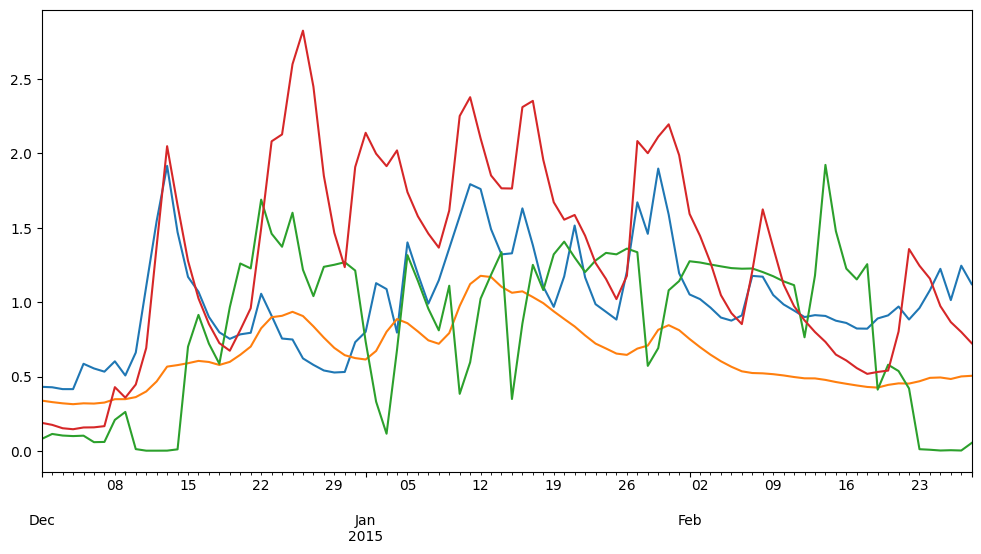

In [59]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

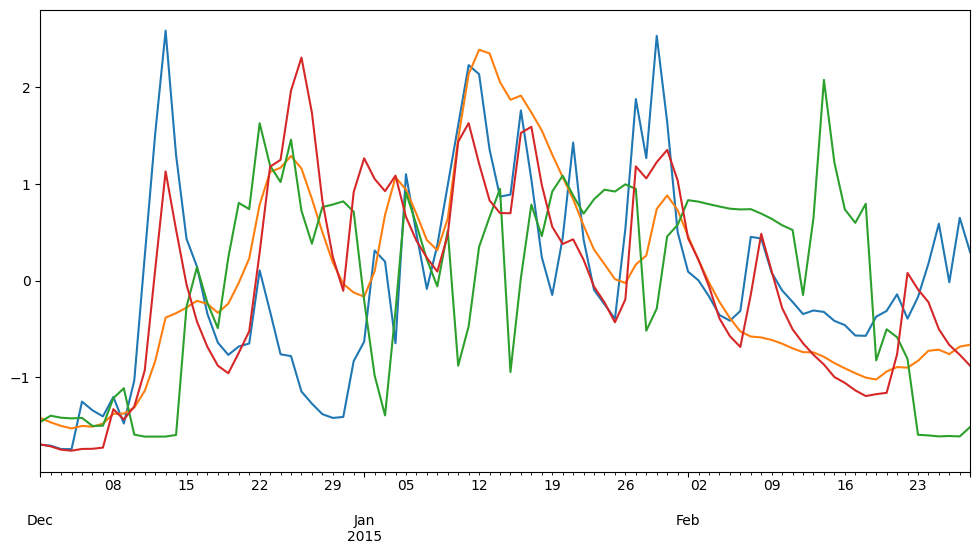

In [60]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

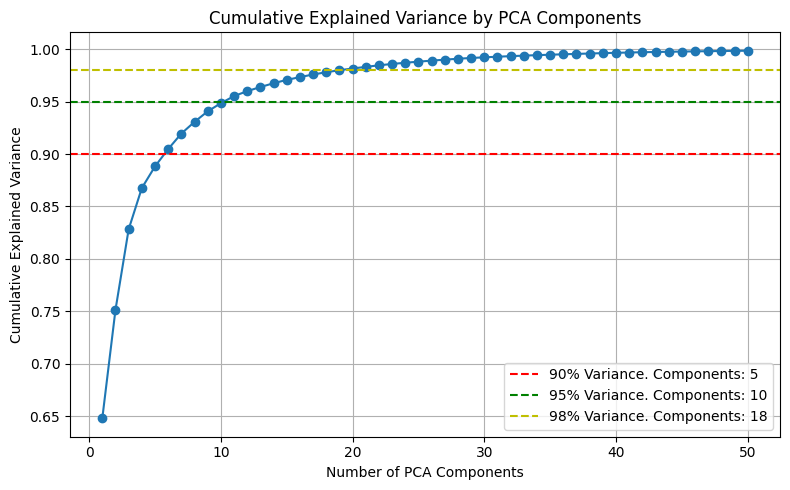

In [61]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [62]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-21.75571103,  -3.84053661,  -2.43858664, ...,  -0.70229852,
         -0.33860142,  -0.64250736],
       [-22.19436769,  -3.8620145 ,  -2.58431127, ...,  -0.67383453,
         -0.27611817,  -0.51839173],
       [-22.69352838,  -3.88462157,  -2.67166822, ...,  -0.64041626,
         -0.18546974,  -0.50179537],
       ...,
       [ -9.25876727,   1.99140006,   0.91502468, ...,  -0.33541327,
         -0.61153105,   0.40400284],
       [ -6.39129408,  -0.2861871 ,   2.76432263, ...,   0.7024603 ,
          0.66272479,   0.49888582],
       [ -7.63199899,   0.77354458,   1.93733227, ...,   0.51972264,
          0.23237535,   0.2340775 ]], shape=(90, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_56632\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


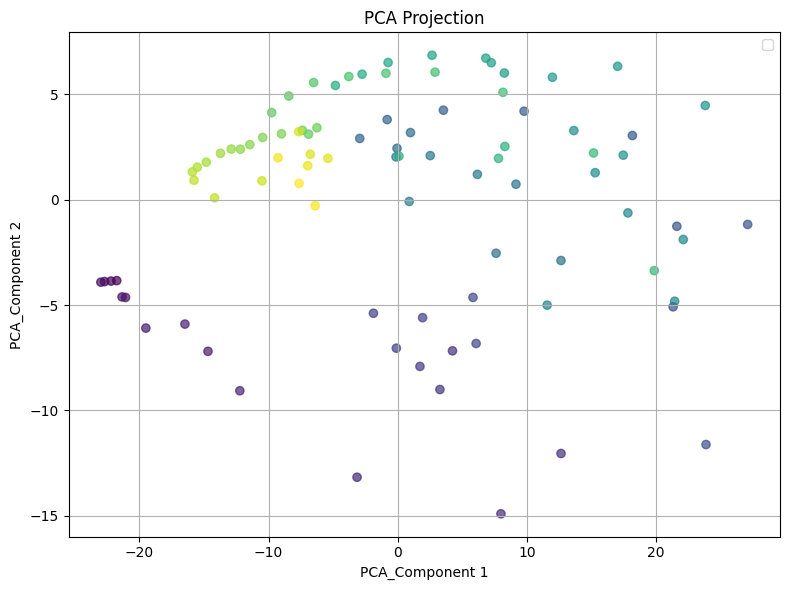

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_56632\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


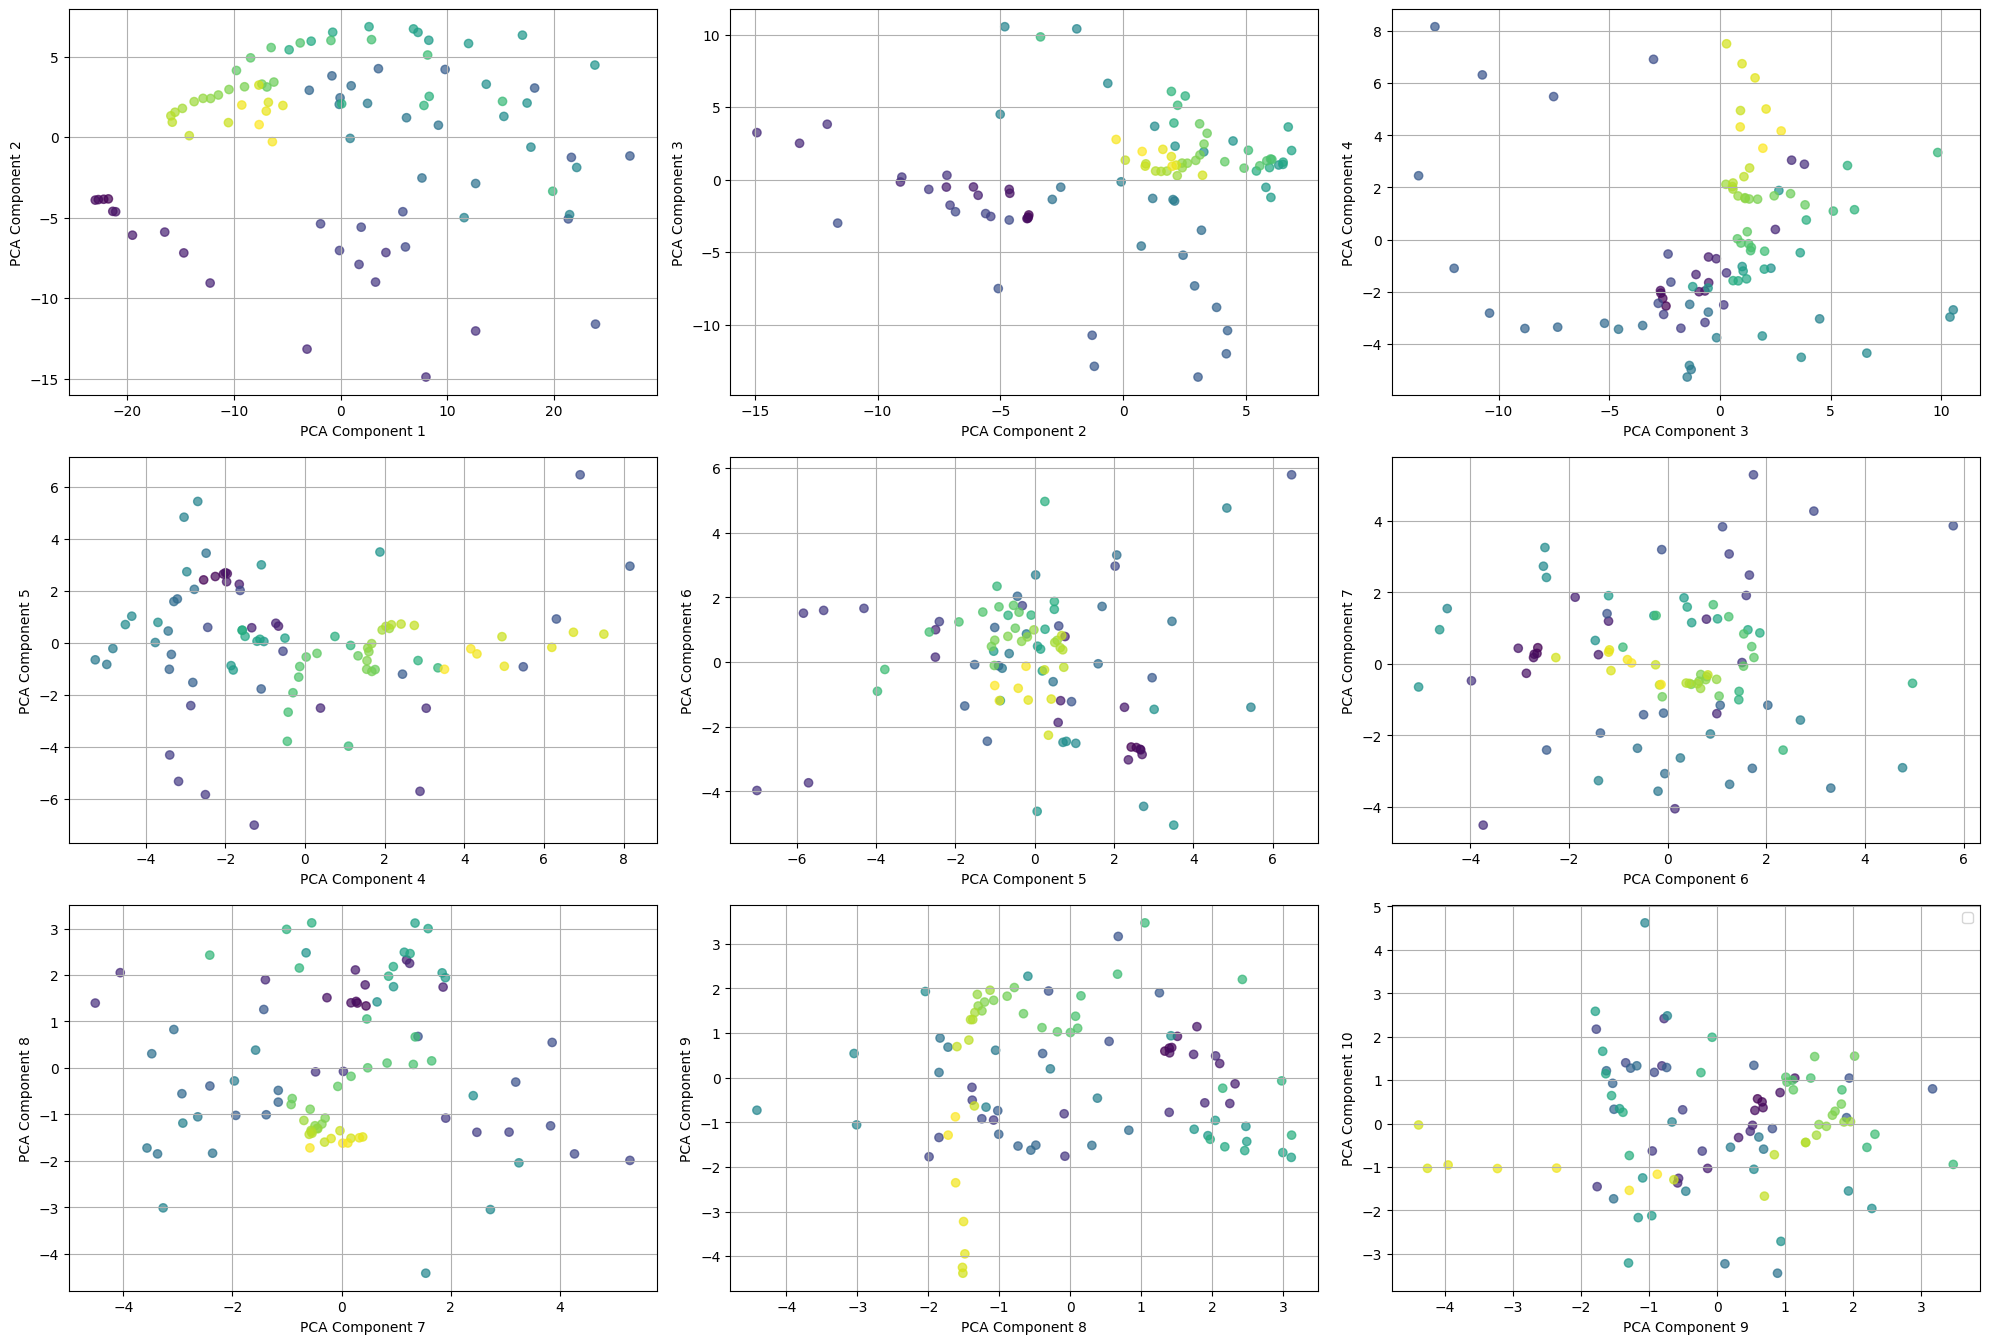

In [64]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [65]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.252
KMeans Davies-Bouldin Index is 1.543


<Axes: xlabel='k'>

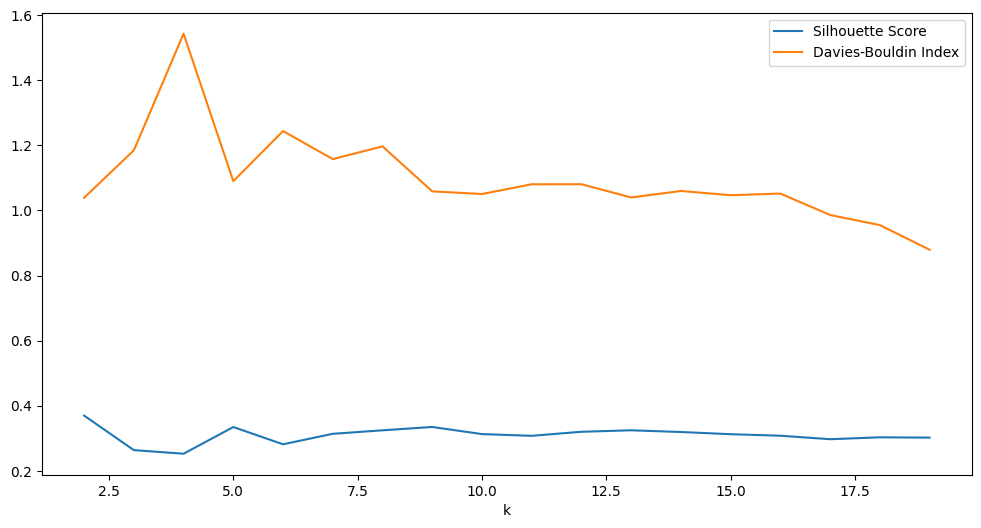

In [66]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     90               NaN   
1    0.76            3         1     86               NaN   
2    1.01            3         2     83          0.023948   
3    1.27            3         3     79         -0.025794   
4    1.52            3         3     78         -0.003120   
5    1.78            3         3     77         -0.003555   
6    2.03            3         3     77         -0.003555   
7    2.29            3         4     71          0.009435   
8    2.54            3         4     65         -0.035476   
9    2.80            3         4     60          0.064510   
10   3.05            3         4     58          0.072133   
11   3.31            3         4     57          0.067506   
12   3.56            3         4     55          0.092909   
13   3.82            3         5     50          0.091908   
14   4.07            3         6     46          0.087188   
15   4.33            3         6     43          0.091029   
16   4.58            3         7     40          0.073727   
17   4.84            3         6     37          0.092042   
18   5.09            3         5     33          0.141496   
19   5.35            3         6     30          0.110391   
20   5.60            3         6     28          0.121556   
21   5.86            3         6     28          0.121556   
22   6.11            3         6     28          0.121556   
23   6.37            3         7     24          0.137679   
24   6.62            3         6     24          0.137382   
25   6.88            3         6     24          0.137382   
26   7.13            3         5     21          0.186021   
27   7.39            3         5     20          0.174424   
28   7.64            3         5     20          0.174424   
29   7.90            3         4     18          0.163539   
30   8.15            3         4     17          0.148245   
31   8.41            3         3     14          0.129748   
32   8.66            3         3     13          0.137408   
33   8.92            3         3     12          0.133577   
34   9.17            3         4      9          0.129652   
35   9.43            3         4      8          0.122694   
36   9.68            3         3      8          0.192699   
37   9.94            3         2      7          0.252942   
38  10.19            3         2      6          0.243900   
39  10.45            3         1      6               NaN   
40  10.70            3         1      6               NaN   
41  10.96            3         1      6               NaN   
42  11.21            3         1      3               NaN   
43  11.47            3         1      3               NaN   
44  11.72            3         1      3               NaN   
45  11.98            3         1      3               NaN   
46  12.23            3         1      3               NaN   
47  12.49            3         1      1               NaN   
48  12.74            3         1      1               NaN   
49  13.00            3         1      1               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2               0.743526  
3               0.853167  
4               0.840267  
5               0.864522  
6               0.864522  
7               0.908315  
8               1.089821  
9               1.026102  
10              1.005823  
11              1.008483  
12              0.974081  
13              1.082271  
14              1.224887  
15              1.324145  
16              1.386759  
17              1.358973  
18              1.103499  
19              1.263167  
20              1.260686  
21              1.260686  
22              1.260686  
23              1.258280  
24              1.286117  
25              1.286117  
26              1.458644  
27              1.451710  
28              1.451710  
29              1.373747  
30              1.426306  
31              1.286166  
32 

<Axes: xlabel='eps'>

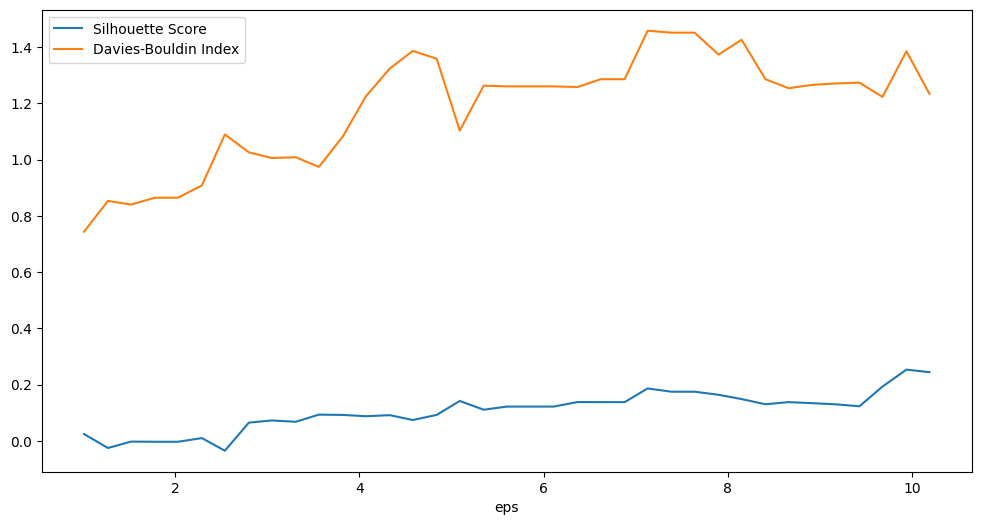

In [67]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

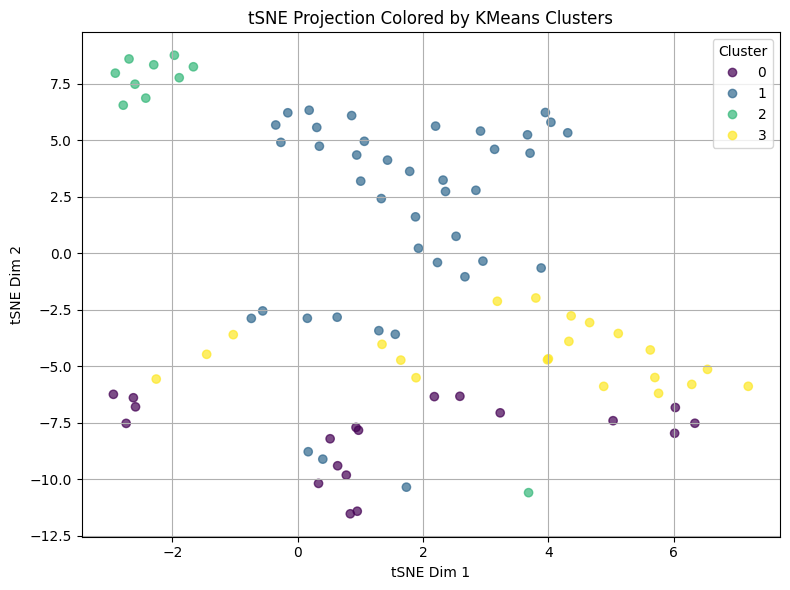

In [68]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         5    235          0.997184   
1    0.05            2         5    235          0.997184   
2    0.06            2         5    235          0.997184   
3    0.06            2         5    235          0.997184   
4    0.07            2         5    235          0.997184   
..    ...          ...       ...    ...               ...   
195  0.98            2        24    195          0.767918   
196  0.99            2        24    195          0.767918   
197  0.99            2        24    195          0.767918   
198  1.00            2        24    195          0.767918   
199  1.00            2        23    195          0.748621   

     Davies-Bouldin Index  
0                0.003066  
1                0.003066  
2                0.003066  
3                0.003066  
4                0.003066  
..                    ...  
195              0.273149  
196              0.273149  
197              0.273149  
198              0.273149  
199              0.291540  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

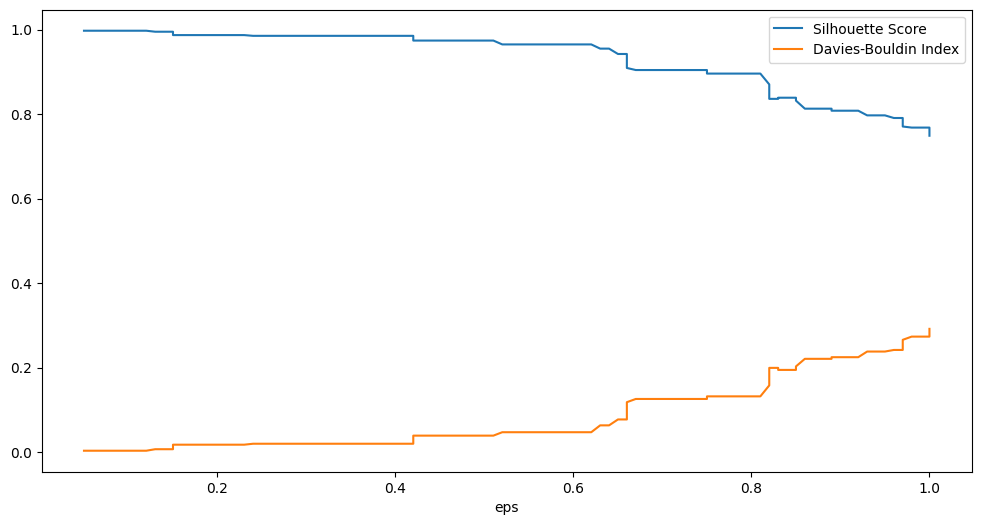

In [69]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))